# Etapas de un problema de machine learning

- Tener una visón amplia. Definir el problema: ¿Qué se pretende predecir? ¿De qué datos se dispone? o ¿Qué datos es necesario conseguir?

- Explorar y entender los datos que se van a emplear para crear el modelo.

- Métrica de éxito: definir una forma apropiada de cuantificar cómo de buenos son los resultados obtenidos.

- Preparar la estrategia para evaluar el modelo: separar las observaciones en un conjunto de entrenamiento, un conjunto de validación (o validación cruzada) y un conjunto de test. Es muy importante asegurar que ninguna información del conjunto de test participa en el proceso de entrenamiento del modelo.

- Preprocesar los datos: aplicar las transformaciones necesarias para que los datos puedan ser interpretados por el algoritmo de machine learning seleccionado.

- Ajustar un primer modelo capaz de superar unos resultados mínimos. Por ejemplo, en problemas de clasificación, el mínimo a superar es el porcentaje de la clase mayoritaria (la moda). En un modelo de regresión, la media de la variable respuesta.

- Gradualmente, mejorar el modelo incorporando-creando nuevas variables u optimizando los hiperparámetros.

- Evaluar la capacidad del modelo final con el conjunto de test para tener una estimación de la capacidad que tiene el modelo cuando predice nuevas observaciones.

- Entrenar el modelo final con todos los datos disponibles.
- Presentar la solución.
- Lanzar, monitorizar y mantener el modelo. 

### Librerías

In [1]:
!pip3 install tabulate

In [2]:
!pip3 install optuna

In [3]:
!pip3 install fitter


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [4]:
!pip3 install tqdm

In [7]:
#from tqdm.autonotebook import tqdm as notebook_tqdm

C:\Users\juanj\AppData\Local\Temp\ipykernel_23560\2439040576.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm as notebook_tqdm


In [5]:
!pip3 install nbconvert


In [6]:
!pip3 install nbconvert[qtpdf]


   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/6.9 MB 2.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.3/6.9 MB 2.3 MB/s eta 0:00:03
   --------- ------------------------------ 1.6/6.9 MB 2.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.1/6.9 MB 2.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.1/6.9 MB 2.0 MB/s eta 0:00:03
   ------------- -------------------------- 2.4/6.9 MB 1.7 MB/s eta 0:00:03
   --------------- ------------------------ 2.6/6.9 MB 1.7 MB/s eta 0:00:03
   ---------------- ----------------------- 2.9/6.9 MB 1.6 MB/s eta 0:00:03
   ------------------ --------------------- 3.1/6.9 MB 1.5 MB/s eta 0:00:03
   ------------------- -------------------- 3.4/6.9 MB 1.5 MB/s eta 0:00:03
   --------------------- ------------------ 3.7/6.9 MB 1.5 MB/s eta 0:00:03
   ---------------------- 

In [7]:
!pip3 install seaborn

In [8]:
!pip3 install statsmodels


In [16]:
#!pip3 install scikit-learn


  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------  10.7/11.0 MB 56.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 49.0 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [9]:
!pip3 install scikit-optimize


#### Tener una visón amplia

Tu primera tarea será utilizar el censo de California para crear un modelo de precios de casas en el estado. Estos datos  incluyen métricas como la población, los ingresos medianos y los precios medianos de las  casas para cada grupo de bloques en California. Los grupos de bloques son la unidad geográfica más pequeña para la que la Oficina del Censo de EE. UU. publica datos simples (un grupo  de bloques suele tener una población de entre 600 y 3.000 personas). Por acortar, vamos a  llamarlos "distritos".  El modelo debería aprender a partir de estos datos y ser capaz de predecir el precio mediano  de las casas en cualquier distrito si se le dan todas las demás métricas.   

Como eres un científico de datos bien organizado, lo primero que deberías hacer es sacar  tu lista de comprobación de proyectos de machine learning. *(Pending)*. 

#### Enmarcar el problema

Lo primero que debes preguntar a tu jefe es cuál es exactamente el objetivo empresarial.  Es probable que crear un modelo no sea la meta final. ¿Cómo espera la empresa utilizar ese  modelo y beneficiarse de él? Conocer el objetivo es importante porque determinará la manera  de enmarcar el problema, qué algoritmos seleccionar, qué medida de rendimiento utilizar para  evaluar el modelo y cuánto esfuerzo se dedicará a ajustarlo.  El jefe responde que la salida del modelo (una predicción del precio mediano de las casas  de un distrito) se introducirá en otro sistema de machine learning  junto  con muchas otras variables .  
Este sistema determinará si merece la pena invertir  en un área determinada. Hacer bien esto es fundamental, ya que afecta de forma directa a los  ingresos.  La siguiente pregunta que debes hacer a tu jefe es cómo es la solución actual (si la hay).  A menudo, la situación actual te dará una referencia para el rendimiento, además de perspectivas sobre cómo resolver el problema. Tu jefe responde que actualmente los precios de  las casas del distrito los estiman a mano un grupo de expertos: un equipo reúne información  actualizada sobre un distrito y, cuando no pueden obtener el precio mediano de las casas, lo  calculan mediante reglas complejas. 

### Tratamiento de datos

In [11]:
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence
import optuna

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

**Configuración Matplotlib**

In [12]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Obtener los Datos

In [14]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

* `tarfile:` Permite manipular archivos .tar o .tar.gz (archivos comprimidos).
* `urllib.request:` Se usa para realizar solicitudes HTTP, como las descarga de archivos desde la web.
* Si el archivo 'housing.tqz' no existe (`if not tarball_path.is_file():`)
    Crea el directorio 'datasets' si aún no existe ('Path("datasets").mkdir(parents=True, exist_ok=True)')
    Descarga el archivo comprimido 'housing.tgz' desde la URL especificada y lo guarda en 'tarball.path'
    (`url = "https://github.com/ageron/data/raw/main/housing.tgz"`)
    (`urllib.request.urlretrieve(url, tarball_path)`)
* Una vez descargado, se abre el archivo '.tgz' usando `tarfile.open()`
* `extractall(path="datasets"):` Extrae todos los archivos dentro de la carpeta 'datasets', donde se encuentra el archivo CSV con los datos.
* `return pd.read_csv(Path("datasets/housing/housing.csv"))` carga el archivo housing.csv en un DataFrame de pandas usando pd.read_csv()
* Finalmente, se llama a la función y se almacena el DataFrame devuelto en la variable housing.

Vamos a empezar por fijarnos en las cinco filas superiores de los datos utilizando el método  head() de DataFrame. 

In [56]:
housing.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


![Fig 1](IMG/1.png)


Cada fila representa un distrito. Hay *10 atributos* (no se muestran todos en la captura de  pantalla): longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population,  households, median_income, median_house_value y ocean_proximity.   


1. **`longitude`** (Longitud): 
   - Representa la **coordenada geográfica de longitud** de la ubicación del bloque censal (un área pequeña de viviendas) en el que se encuentra la propiedad. Las longitudes negativas indican que el lugar está en el hemisferio occidental, lo que es coherente con ubicaciones en California.

2. **`latitude`** (Latitud): 
   - Representa la **coordenada geográfica de latitud** de la ubicación del bloque censal. La latitud positiva indica que está en el hemisferio norte, lo que es correcto para California.

3. **`housing_median_age`** (Edad mediana de las viviendas):
   - Indica la **edad mediana de las viviendas** en el bloque censal, en años. Una mayor edad puede sugerir propiedades más antiguas, mientras que un valor bajo indica construcciones más recientes.

4. **`total_rooms`** (Total de habitaciones):
   - El **número total de habitaciones** en todas las viviendas de ese bloque censal. Este valor no es por vivienda, sino que es una suma para todas las viviendas del bloque.

5. **`total_bedrooms`** (Total de dormitorios):
   - El **número total de dormitorios** en todas las viviendas del bloque censal. Similar a `total_rooms`, esta variable representa una suma para el área, no por vivienda individual.

6. **`population`** (Población):
   - El **número total de personas** que viven en el bloque censal. Proporciona una medida de densidad de población o la cantidad de personas que residen en ese vecindario.

7. **`households`** (Hogares):
   - El **número total de hogares** en el bloque censal. Un hogar puede incluir una o más personas viviendo en una vivienda particular.

8. **`median_income`** (Ingreso mediano):
   - Representa el **ingreso mediano** de los hogares en ese bloque censal. Este valor está escalado, donde 1.0 aproximadamente equivale a \$10,000 USD, por lo que un valor de **8.3252** representa un ingreso mediano de aproximadamente \$83,252.

9. **`median_house_value`** (Valor mediano de la vivienda):
   - Es el **valor mediano de las viviendas** en dólares estadounidenses en ese bloque censal. Este es el valor mediano del precio de las viviendas en esa área.

10. **`ocean_proximity`** (Proximidad al océano):
    - Es una **variable categórica** que indica la proximidad de las viviendas al océano. Los valores típicos pueden incluir categorías como:
      - `NEAR BAY`: Cerca de una bahía.
      - `INLAND`: En tierra, lejos de la costa.
      - `NEAR OCEAN`: Cerca del océano.
      - `ISLAND`: En una isla.

El método info() es útil para obtener una descripción rápida de los datos, en particular el  número total de filas, el tipo de cada atributo y el número de valores no nulos:

In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Hay 20.640 instancias en el conjunto de datos, lo que significa que es bastante pequeño  según los estándares del machine learning, pero es perfecto para empezar. Puedes observar que  el atributo **total_bedrooms** solo tiene 20.433 valores no nulos, lo que significa que a 207 distritos  les falta esta característica. Tendremos que ocuparnos de eso más adelante.  Todos los atributos son numéricos, excepto ocean_proximity. Su tipo es object, así que  podría albergar cualquier tipo de objeto de Python, pero, como has cargado estos datos desde  un archivo CSV, sabes que tiene que ser un atributo de texto. Es probable que, cuando te hayas  fijado en las cinco filas superiores, hayas notado que los valores en la columna ocean_proximity  eran repetitivos, lo que significa que se trata, probablemente, de un atributo categórico. Puedes  averiguar qué categorías existen y cuántos distritos pertenecen a cada categoría utilizando el  método value_counts(): . 

In [54]:
>>> housing["ocean_proximity"].value_counts() 

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Vamos a echar un vistazo a los otros campos. El método describe() muestra un resumen  de los atributos numéricos. 

In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> Ajuste los decimales del describe a solo dos dígitos

Las filas count, mean, min y max son evidentes. Observa que los valores nulos se ignoran (así,  por ejemplo, en count de total_bedrooms tenemos 20.433, no 20.640). La fila std muestra la  desviación estándar, que mide cómo de dispersos están los valores.5 Las filas 25%, 50% y 75%  muestran los percentiles correspondientes: un percentil indica el valor por debajo del cual queda  un porcentaje de observaciones dado en un grupo de observaciones. Por ejemplo, el 25% de los  distritos tienen housing_median_age inferior a 18, mientras que el 50% están por debajo de 29  y el 75% están por debajo de 37. Esto se denomina a menudo percentil 25 (o primer cuartil),  mediana y percentil 75 (o tercer cuartil).

In [29]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Otra manera rápida de hacerse una idea del tipo de datos que estamos manejando es trazar  un histograma para cada atributo numérico. Un histograma muestra el número de instancias (en  el eje vertical) que tienen un rango de valores dado (en el eje horizontal). Podemos trazar esto  de atributo en atributo o podemos llamar al método hist() en el conjunto de datos completo  (como se muestra en el siguiente ejemplo de código) y eso trazará un histograma para cada  atributo numérico. . 

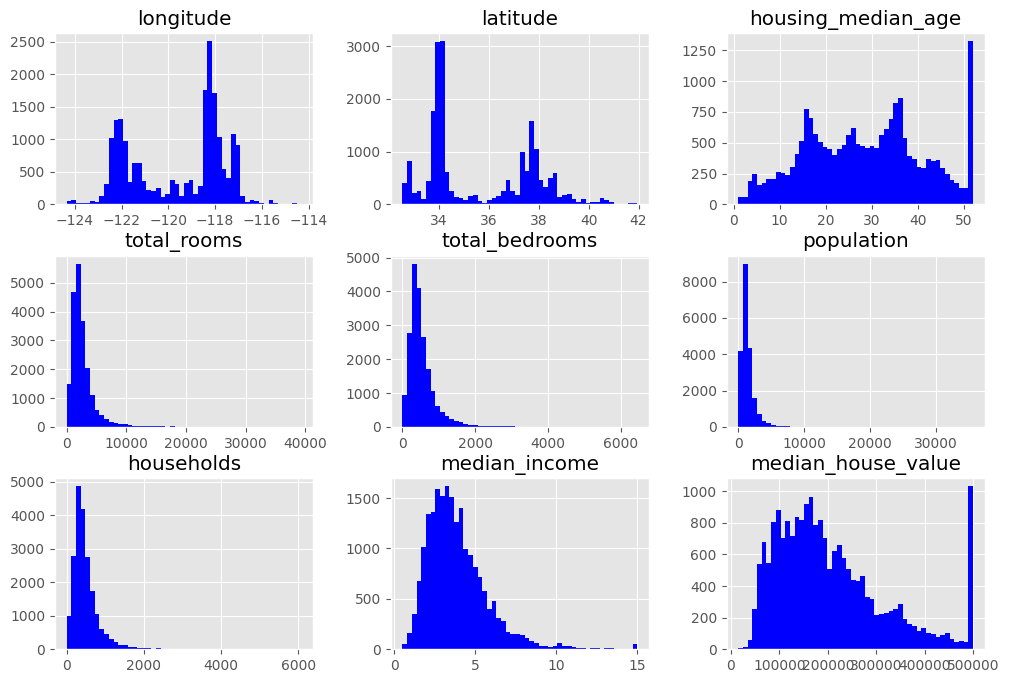

In [16]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8), color='blue')
plt.show() 

Si te fijas en estos histogramas, notarás varias cosas:. 

Primero, el atributo de los ingresos medianos no parece estar expresado en dólares  estadounidenses. Después de hablar con el equipo que recopiló los datos, te dicen que  se han escalado y limitado a 15 (en realidad, 15,0001) para ingresos medianos elevados y a 0,5 (en realidad, 0,4999) para ingresos medianos bajos. Los números representan,  de forma aproximada, decenas de miles de dólares (por ejemplo, 3 en realidad significa 30.000 dólares). Trabajar con atributos preprocesados es habitual en el machine  learning y no tiene por qué ser un problema, pero deberías tratar de entender cómo se  han computado los datos.  

La edad mediana de la casa y el valor mediano de la casa también están limitados. Este  último puede ser un problema serio, puesto que es tu atributo objetivo (tus etiquetas).  Puede que tus algoritmos de machine learning aprendan que los precios nunca pasan de  ese límite. Tienes que hablar con el equipo cliente (el equipo que utilizará el resultado de  tu sistema) para ver si eso es un problema o no. Si te dicen que necesitan predicciones  precisas incluso más allá de 500.000 dólares, entonces tienes dos opciones:  
- Recopilar etiquetas adecuadas para los distritos cuyas etiquetas estaban limitadas.
- Eliminar esos distritos del conjunto de entrenamiento (y también del conjunto  de prueba, ya que el sistema no debería evaluarse mal si predice valores más allá  de 500.000).
  
Estos atributos tienen escalas muy diferentes.

Por último, muchos histogramas están sesgados a la derecha: se extienden mucho más  hacia la derecha de la mediana que hacia la izquierda. Esto puede dificultar un poco la  detección de patrones por parte de algunos algoritmos de machine learning. Probaremos  a transformar estos atributos más adelante para tener distribuciones más simétricas  y con forma más acampanada.. 

#### Crear un conjunto de prueba.

Puede que parezca extraño separar una parte de los datos en esta etapa. Al fin y al cabo,  solo has echado un vistazo rápido a los datos y, seguramente, deberías aprender mucho más  sobre ellos antes de decidir qué algoritmos utilizar, ¿no? Eso es cierto, pero el cerebro es un  sistema de detección de patrones asombroso, lo que también significa que es muy propenso al  sobreajuste: si te fijas en el conjunto de prueba, puede que te topes con algún patrón aparentemente interesante en los datos de prueba que te lleva a seleccionar un tipo particular de modelo  de machine learning.  
Si calculas el error de generalización utilizando el conjunto de prueba, la  estimación será demasiado optimista y lanzarás un sistema que no tendrá un rendimiento tan  bueno como se esperaba.  
Esto se llama sesgo de "espionaje de datos".  En teoría, crear un conjunto de prueba es simple; elige algunas instancias de forma aleatoria, por lo general el 20% del conjunto de datos (o menos, si el conjunto es muy grande) y  déjalas aparte:

In [19]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f"Conjunyo de entrenamiento: {len(train_set)}\n")
print(f"Conjunto de prueba: {len(test_set)}")

Conjunyo de entrenamiento: 16512

Conjunto de prueba: 4128


Si ejecutas el programa otra vez, ¡generará un conjunto  de prueba diferente! Con el tiempo, tú (o tus algoritmos de machine learning) acabarás viendo  el conjunto de datos completo, que es lo que quieres evitar.  

1. **Guardar el conjunto de prueba en la primera ejecución**:
   - Una opción es **guardar el conjunto de prueba** la primera vez que lo generes, y luego simplemente **cargarlo en futuras ejecuciones**. Esto asegura que siempre estés usando el mismo conjunto de prueba.
   - **Limitación**: Esta solución falla si el dataset se actualiza (si añades más datos). Los nuevos datos no se verán reflejados en el conjunto de prueba, lo que podría no ser ideal.

2. **Usar una semilla aleatoria fija**:
   - Otra opción es establecer una **semilla fija** para el generador de números aleatorios. Por ejemplo, usando `np.random.seed(42)` antes de hacer la división, te aseguras de que **la mezcla de los datos sea siempre la misma** en cada ejecución.
   - **Limitación**: Al igual que la primera solución, esta estrategia no maneja bien las actualizaciones del dataset, ya que los nuevos datos no serán asignados consistentemente a los conjuntos de entrenamiento o prueba.

3. **Dividir según el identificador de cada instancia**:
   - Si cada instancia en tu dataset tiene un **identificador único e inmutable** (por ejemplo, un ID de cliente, número de serie, etc.), puedes usar este identificador para determinar a qué conjunto debe pertenecer cada instancia.
   - **Cómo hacerlo**: Se puede calcular un **hash** del identificador de cada instancia, y si el valor del hash es inferior o igual a un umbral (por ejemplo, el 20% del valor máximo del hash), esa instancia se coloca en el conjunto de prueba. Si es mayor, va al conjunto de entrenamiento.
   - **Ventaja**: Esto garantiza que la división entre entrenamiento y prueba se mantenga estable incluso si actualizas el dataset (añadiendo nuevas instancias). Las instancias ya asignadas a los conjuntos no cambiarán, y las nuevas instancias se distribuirán en función del hash, sin que ninguna instancia previamente asignada al conjunto de entrenamiento se mueva al conjunto de prueba.
 
. 

Esta es una posible implementación:  


In [59]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Por desgracia, el conjunto de datos de las casas no tiene una columna de identificador. La  solución más simple es utilizar el índice de la fila como identificador: 

In [60]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

Si utilizas el índice de la fila como identificador único, tienes que asegurarte de que los  datos nuevos se añaden al final del conjunto de datos y de que ninguna fila se elimina jamás.  Si eso no es posible, entonces intenta utilizar las características más estables para crear un  identificador único. Por ejemplo, se puede garantizar que la latitud y la longitud de un distrito  se mantendrán estables durante varios millones de años, así que podrías combinarlas para  formar un identificador, así:. 

In [61]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

Scikit-Learn ofrece varias funciones para dividir conjuntos de datos en varios subconjuntos  de distintas maneras. La función más simple es **train_test_split()**, que hace básicamente  lo mismo que la función **shuffle_and_split_data()** que hemos definido antes con un par de  características adicionales. En primer lugar, hay un parámetro random_state que nos permite  establecer la semilla aleatoria del generador. En segundo lugar, podemos pasarle múltiples  conjuntos de datos con un número idéntico de filas y los dividirá en los mismos índices:. 

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [31]:
test_set["total_bedrooms"].isnull().sum()

44

Hasta ahora, hemos considerado métodos de muestreo puramente aleatorios. Por lo  general, eso suele servir si el conjunto de datos es lo bastante grande (sobre todo en relación  al número de atributos), pero, si no lo es, corremos el riesgo de introducir un sesgo muestral  significativo.   

Supongamos que has hablado con algunos expertos que te dicen que los ingresos medianos son un atributo muy importante para predecir los precios medianos de las casas. Te  convendría asegurarte de que el conjunto de prueba es representativo de las diferentes categorías de ingresos en el conjunto de datos completo. Puesto que los ingresos medianos son  un atributo numérico continuo, primero hay que crear un atributo de categorías de ingresos.  Vamos a fijarnos con más detenimiento en el histograma de ingresos medianos:   
La mayoría de los valores de ingresos medianos se agrupan en torno al 1,5-6 (es  decir, 15.000-60.000 dólares), pero algunos ingresos medianos van más allá de 6. Es importante  tener una cantidad suficiente de instancias en el conjunto de datos para cada estrato o, de lo  contrario, la estimación de la importancia de un estrato podría distorsionarse. Eso significa  que no deberías tener demasiados estratos y cada estrato debería ser lo bastante grande.  
El  siguiente código utiliza la función `pd.cut()` para crear un atributo de categorías de ingresos  con cinco categorías (etiquetadas del 1 al 5); la categoría 1 va de 0 a 1,5 (es decir, menos  de 15.000 dólares), la categoría 2 va de 1,5 a 3, y así sucesivamente:. 

In [32]:
# Creamos una nueva columna llamada income_cat a partir de la columna median_income dividiendo los valores de ingreso mediano en categorías.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

Los bins son los límites que definen los intervalos (o categorías) en los que se dividen los datos. Cada valor en median_income será asignado a uno de estos intervalos:  

[0., 1.5): Valores de ingreso mediano entre 0 y 1.5 (no incluido).  

[1.5, 3.0): Valores entre 1.5 y 3.0.  

[3.0, 4.5): Valores entre 3.0 y 4.5.  

[4.5, 6.0): Valores entre 4.5 y 6.0.  

[6.0, np.inf): Valores de 6 en adelante (hasta infinito, es decir, no hay un límite superior).  


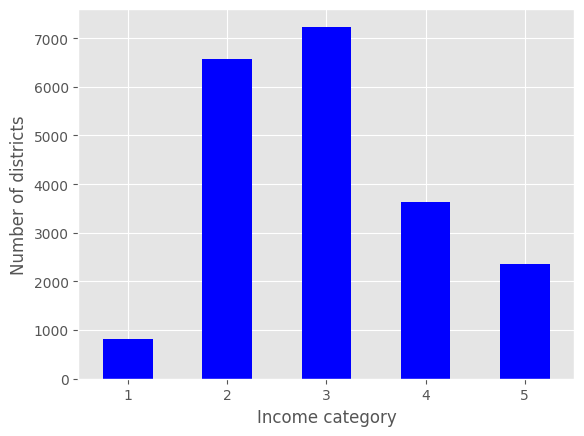

In [33]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True, color='blue')
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Ahora ya se puede hacer un muestreo estratificado basado en la categoría de ingresos.  Scikit-Learn proporciona varias clases de división en el paquete `sklearn.model_selection` que  implementa varias estrategias para dividir tu conjunto de datos en un conjunto de entrenamiento  y un conjunto de prueba. Cada divisor tiene un método `split()` que devuelve un iterador sobre  diferentes divisiones entrenamiento/prueba de los mismos datos. Para ser exactos, el método  `split()` produce los índices de entrenamiento y prueba, no los datos en sí. Tener múltiples  divisiones puede resultar útil si quieres calcular mejor el rendimiento de tu modelo, como veremos cuando hablemos de la validación cruzada más adelante. Por ejemplo, el  siguiente código genera 10 divisiones estratificadas diferentes del mismo conjunto de datos:. 

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])



[[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  13096    -122.42     37.80                52.0       3321.0          1115.0   
  14973    -118.38     34.14                40.0       1965.0           354.0   
  3785     -121.98     38.36                33.0       1083.0           217.0   
  14689    -117.11     33.75                17.0       4174.0           851.0   
  20507    -118.15     33.77                36.0       4366.0          1211.0   
  ...          ...       ...                 ...          ...             ...   
  14207    -118.40     33.86                41.0       2237.0           597.0   
  13105    -119.31     36.32                23.0       2945.0           592.0   
  19301    -117.06     32.59                13.0       3920.0           775.0   
  19121    -118.40     34.06                37.0       3781.0           873.0   
  19888    -122.41     37.66                44.0        431.0           195.0   
  
         population  hous

Por ahora, puedes usar solo la primera división:. 

In [38]:
strat_train_set, strat_test_set = strat_splits[0]
print(strat_train_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  media

O, puesto que el muestreo estratificado es bastante común, hay una manera más breve de  conseguir una sola división usando la función train_test_split() con el argumento stratify:. 

In [74]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

Vamos a ver si esto funciona como se esperaba. Puedes empezar por fijarte en las proporciones de la categoría de ingresos en el conjunto de prueba:. 

In [75]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Con un código similar, puedes medir las proporciones de la categoría de ingresos en el  conjunto de datos completo.. 

In [76]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1) # Conjunto completo
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


En la tabla de arriba se comparan las proporciones de la categoría de ingresos  en el conjunto global (Overall), en el conjunto de prueba generado con el muestreo estratificado (Stratified) y en un  conjunto de prueba generado mediante un muestreo puramente aleatorio (Random).  
Como se puede ver,  el conjunto generado mediante el muestreo estratificado tiene unas proporciones de la categoría  de ingresos casi idénticas a las del conjunto de datos completo, mientras que el conjunto de  prueba generado con un muestreo aleatorio está distorsionado.. 

No vamos a volver a usar la columna income_cat, así que podemos olvidarla y revertir los  datos a su estado original: . 

In [77]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Se ha dedicado tiempo a la generación de un conjunto de prueba por una buena  razón: **se trata de una parte crucial de un proyecto de machine learning** que a menudo se  desatiende. Además, muchas de estas ideas serán útiles más adelante, cuando hablemos de  la validación cruzada. Ahora vamos a pasar a la siguiente etapa: **explorar los datos** . 

#### Explorar y visualizar los datos para tener un mayor entendimiento.  

Hasta ahora, solo has echado un vistazo rápido a los datos para entender a nivel general  qué tipos de datos estás manipulando.  

En primer lugar, asegúrate de que has apartado el conjunto de prueba y solo estás explorando el conjunto de entrenamiento. Además, si el conjunto de entrenamiento es muy grande,  puede que quieras crear un conjunto de exploración para hacer que la manipulación sea más  rápida y sencilla durante la fase de exploración. En este caso, el conjunto de entrenamiento es  bastante pequeño, así que podemos trabajar directamente en el conjunto completo. Puesto que  vamos a experimentar con varias transformaciones del conjunto de entrenamiento completo,  deberíamos hacer una copia del original para poder revertir a él después: . 

In [78]:
housing = strat_train_set.copy() 

### Visualizar datos geográficos.  
Puesto que el conjunto de datos incluye información geográfica (latitud y longitud), es  buena idea crear un diagrama de dispersión de todos los distritos para visualizar los datos:  
. 

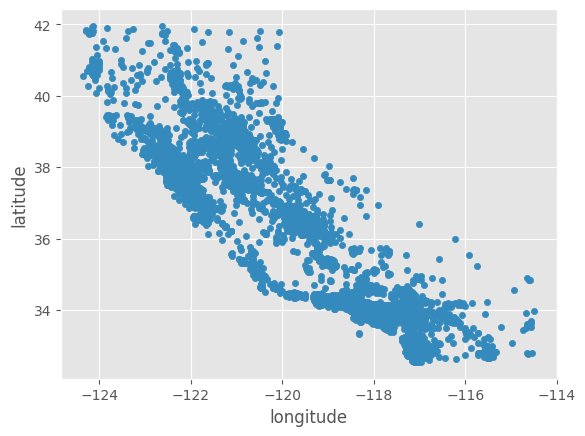

In [80]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

Configurar la opción alpha como 0.2 hace que sea mucho más fácil visualizar los lugares donde  hay una densidad alta de puntos de datos:

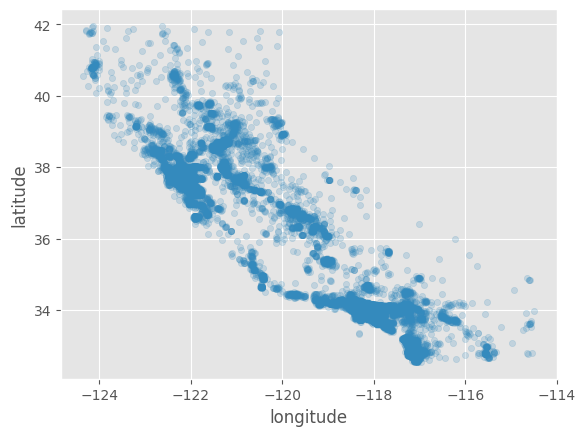

In [82]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Se puede ver con claridad las áreas de alta densidad, concretamente el Área de la Bahía y los alrededores de Los Ángeles y San Diego, además de una línea  larga de áreas de densidad bastante alta en el Valle Central (en particular en Sacramento  y Fresno). A nuestros cerebros se les da muy bien detectar patrones en imágenes, pero puede que  tengamos que juguetear un poco con los parámetros de visualización para hacer que esos  patrones destaquen.. . 

Ahora nos fijamos en los **precios de las casas**. El radio de cada  círculo representa la población del distrito (opción s) y el color representa el precio (opción c).  Aquí usamos un mapa de color predefinido (opción cmap) llamado jet, que va del azul (valores  bajos) al rojo (precios altos):. 

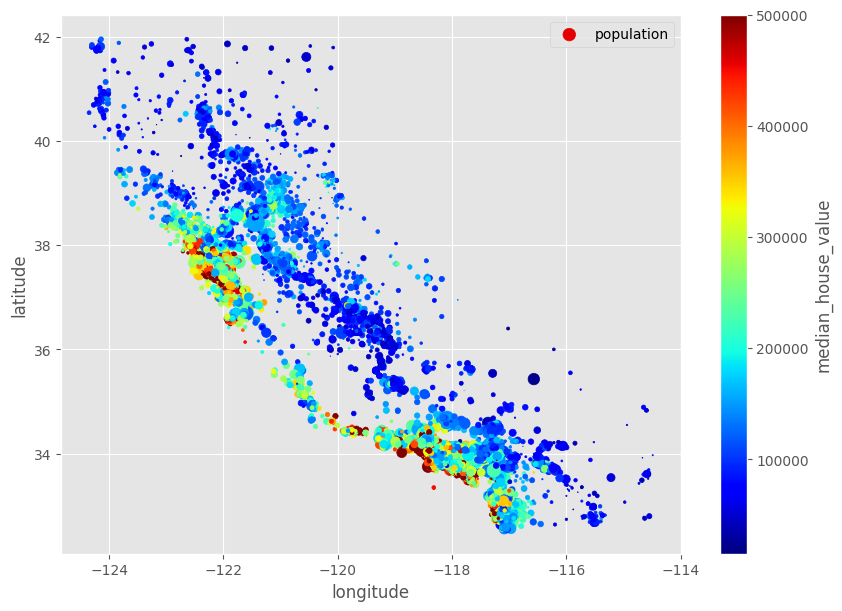

In [83]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

Esta imagen nos indica que los precios de las casas están muy relacionados con la ubicación  (por ejemplo, cerca del océano) y con la densidad de población, como probablemente ya todo el mundo sabe.  Un algoritmo de agrupamiento debería ser útil para detectar el agrupamiento principal y para  añadir nuevas características que midan la proximidad a los centros de los agrupamientos. El  atributo de la proximidad del océano también puede ser útil, aunque en el norte de California  los precios de las casas en los distritos costeros no son demasiado altos, así que no es una  regla simple. . 

#### Buscar correlaciones.    
Puesto que el conjunto de datos no es demasiado grande, puedes calcular con facilidad el  coeficiente de correlación estándar (también llamado coeficiente r de Pearson) entre cada par  de atributos utilizando el método `corr()`:. 

In [84]:
corr_matrix = housing.corr(numeric_only=True)

Ahora puedes fijarte en cuánto se correlaciona cada atributo con el valor mediano de las  casas:. 

In [85]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

El coeficiente de relación va de -1 a 1. Cuando se acerca a 1, significa que hay una correlación  positiva fuerte; por ejemplo, el valor mediano de las casas tiende a subir cuando los ingresos  medianos suben. Cuando el coeficiente se acerca a -1, significa que hay una correlación negativa fuerte; podemos ver una pequeña correlación negativa entre la latitud y el valor mediano  de la casa (es decir, los precios tienen una ligera tendencia a bajar cuando avanzamos hacia  el norte). Por último, los coeficientes que se acercan a 0 significan que no hay una correlación  lineal.. 

Otra forma de comprobar la correlación entre atributos es utilizar la función scatter_matrix()  de Pandas, que traza cada atributo numérico frente a otro atributo numérico. Puesto que  hay 11 atributos numéricos, obtendríamos $11^2$ = 121 gráficos, que no cabrían en una página,  así que vamos a centrarnos en unos pocos atributos prometedores que parezcan estar más  correlacionados con el valor mediano de las casas. . 

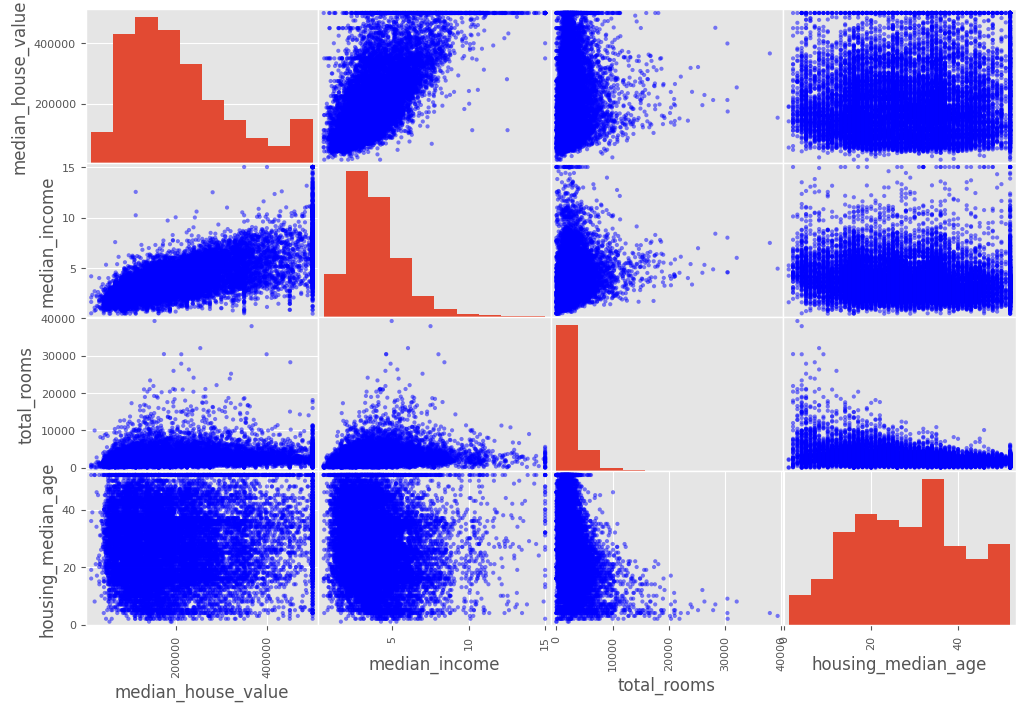

In [87]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), color='blue')
plt.show()

Fijándonos en los gráficos de dispersión de las correlaciones, parece que el atributo más  prometedor para predecir el valor mediano de las casas es el de los ingresos medianos, así que  nos centramos en su diagrama de dispersión.

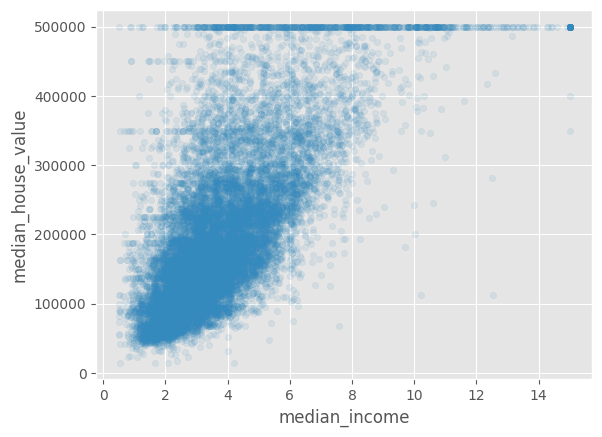

In [89]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

Este gráfico revela varias cosas. En primer lugar, la correlación es bastante fuerte; se  puede ver con claridad la tendencia ascendente y los puntos no están demasiado dispersos.  En segundo lugar, el límite de precio que habíamos observado antes es claramente visible  como una línea horizontal en 500.000 dólares. Pero el gráfico también revela otras líneas  rectas menos evidentes: una línea horizontal alrededor de los 450.000 dólares, otra alrededor  de 350.000 dólares, quizá otra alrededor de 280.000 dólares y algunas más por debajo de eso.  Te convendría intentar eliminar los distritos correspondientes para evitar que los algoritmos  aprendan a reproducir estas singularidades de los datos. . 

#### Experimentar con combinaciones de atributos.  

Antes de preparar los datos para los  algoritmos de machine learning se pueden probar varias combinaciones de atributos. Por ejemplo, el  número total de habitaciones en un distrito no resulta muy útil si no sabemos cuántas casas  hay. Lo que de verdad nos interesa es el número de habitaciones por casa. De manera similar,  el número total de dormitorios en sí no es muy útil: conviene compararlo con el número de  habitaciones. También el número de personas por casa para una combinación de atributos es  interesante. Estos nuevos atributos se crean de la siguiente manera:. . 

In [90]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

Y ahora vamos a volver a fijarnos en la matriz de correlaciones:. 

In [91]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

El nuevo atributo bedrooms_ratio está mucho más correlacionado con  el valor mediano de las casas que el número total de habitaciones o dormitorios. Parece que  las casas con una proporción dormitorios/habitaciones más baja tienden a ser más caras. El  número de habitaciones por casa también es más informativo que el número total de habitaciones en un distrito; es evidente que cuanto más grandes sean las casas, más caras serán.  Esta ronda de exploración no tiene por qué ser exhaustiva; el objetivo es empezar con  buen pie y obtener cuanto antes un entendimiento que ayude a conseguir un primer prototipo  razonablemente bueno, pero se trata de un proceso iterativo: una vez que tengas un prototipo  en marcha, puedes analizar su salida para adquirir un entendimiento aún mayor y volver a este  paso de exploración.. 

#### Preparar los datos para algoritmos de machine learning.  

En el momento de preparar los datos para tus algoritmos de machine learning. En vez de  hacerlo a mano, se pordrían escribir funciones para este fin, por varias razones:   

-  Te permitirá reproducir estas transformaciones con facilidad en cualquier conjunto de  datos (por ejemplo, la próxima vez que consigas un conjunto de datos nuevo).  
-  Poco a poco irás creando una biblioteca de funciones de transformación que podrás  reutilizar en futuros proyectos.
-  Puedes utilizar estas funciones en tu sistema vivo para transformar los datos nuevos  antes de introducirlos en los algoritmos.
-  Podrás probar con facilidad varias transformaciones y ver qué combinación de transformaciones funciona mejor.

Primero, vamos a volver a un conjunto de entrenamiento limpio (mas bien original o sin manipular) (copiando otra vez  strat_train_set). También deberíamos separar los predictores y las etiquetas (target), puesto que no  tenemos por qué querer aplicar las mismas transformaciones a los predictores y los valores  objetivo (fíjate en que drop() crea una copia de los datos y no afecta a strat_train_set):

In [92]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Limpiar datos

La mayoría de los algoritmos de machine learning no pueden funcionar si faltan características, así que necesitamos ocuparnos de ello. Por ejemplo, antes hemos visto que al atributo  total_bedrooms le faltan algunos valores. Tenemos tres opciones para solucionarlo:  

1. Deshacernos de los distritos correspondientes (Eliminar filas).
2. Deshacernos de todo el atributo (Eliminar la columna).
3. Establecer algún valor para esos valores que faltan (cero, la media, la mediana, etc.).  Esto se denomina "imputación". . 

Esto puede hacerse con facilidad utilizando los métodos dropna(), drop() y fillna() de  DataFrame de Pandas: 

```
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [105]:
null_rows_idx = housing.isnull().any(axis=1) # Quiero ver los NaN
housing.loc[null_rows_idx].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN
17796,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,<1H OCEAN
4091,-122.41,38.16,37.0,1549.0,NaN,863.0,275.0,2.7457,NEAR BAY
16775,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,NEAR OCEAN
9827,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,<1H OCEAN
19828,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,NEAR BAY


En este ejemplo se utilizará la opcion 3 puesto que es la menos destructiva, pero, en vez del código  anterior, vamos a usar una clase de Scikit-Learn útil: `SimpleImputer`. El beneficio es que almacenará el valor de la mediana de cada característica: eso hará posible imputar valores que faltan,  no solo al conjunto de entrenamiento, sino también al conjunto de validación, el conjunto de  prueba y cualquier dato nuevo que se proporcione al modelo. Para usarla, primero tienes que  crear una instancia SimpleImputer, especificando que quieres reemplazar los valores que faltan  de cada atributo con la mediana de ese atributo:. 

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Puesto que la mediana solo puede calcularse en atributos numéricos, tienes que crear  después una copia de los datos solo con los atributos numéricos (eso excluirá el atributo de  texto `ocean_proximity`):. 

In [95]:
housing_num = housing.select_dtypes(include=[np.number])

Ahora ya se puede ajustar la instancia imputer a los datos de entrenamiento utilizando el método  fit():. 

In [96]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

La instancia imputer simplemente ha calculado la mediana de cada atributo y ha almacenado el resultado en su variable de instancia statistics_. Solo le faltaban valores al atributo  total_bedrooms, pero no podemos estar seguros de que no faltarán valores en datos nuevos  después de que se lance el sistema, así que es más seguro aplicar imputer a todos los atributos  numéricos:

In [97]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [98]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Ahora puedes utilizar esta instancia imputer "entrenada" para transformar los datos de  entrenamiento sustituyendo valores que faltan por las medianas aprendidas:. 

In [99]:
X = imputer.transform(housing_num)

Los valores que faltan también pueden sustituirse por el valor medio (strategy="mean"), por el  valor más frecuente (strategy="most_frequent") o por un valor constante (strategy="constant",  fill_value=...). Las dos últimas estrategias admiten datos no numéricos.

También hay imputadores más potentes disponibles en el paquete sklearn.impute (ambos  son solo para características numéricas):  

-  `KNNImputer` sustituye cada valor que falta por la media de los valores de los k vecinos más  cercanos para esa característica. La distancia se basa en todas las características disponibles.   
-  `IterativeImputer` entrena un modelo de regresión por característica para predecir los valores que faltan basándose en todas las demás características disponibles. Después, entrena  el modelo otra vez con los datos actualizados y repite el proceso varias veces, mejorando  los modelos y los valores de sustitución con cada iteración.. 

Los transformadores de Scikit-Learn generan como salida arrays NumPy (o, a veces,  arrays dispersos de SciPy) incluso cuando se les dan DataFrames de Pandas como entrada. Así, pues, la salida de `imputer.transform(housing_num)` es una matriz NumPy: X no tiene ni  nombres de columnas ni índice. Por suerte, por lo que tenemos que envolver X en un DataFrame  y recuperar los nombres de columnas y el índice desde housing_num:

In [100]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [101]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [107]:
housing_tr.loc[null_rows_idx].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020
17796,-118.31,34.03,47.0,1315.0,434.0,785.0,245.0,1.2300
4091,-122.41,38.16,37.0,1549.0,434.0,863.0,275.0,2.7457
16775,-118.30,33.72,35.0,2790.0,434.0,1167.0,441.0,6.2028
9827,-121.85,36.61,38.0,238.0,434.0,191.0,67.0,1.3897
19828,-122.08,37.39,4.0,2292.0,434.0,1050.0,584.0,4.8036


#### Busqueda de Outliers

In [109]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [110]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

-1 Outlier  
1 No es outlier

> Investigar como se puede filtrar e imprimir los outliers en un dataframe distinto.

Si se quieren eliminar los outliers se puede usar:

In [ ]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

#### Manejar atributos de texto y categóricos.  
Hasta ahora, solo hemos tratado con atributos numéricos, pero tus datos también pueden  contener atributos de texto. En este conjunto de datos, solo hay uno: el atributo ocean_proximity.  Echemos un vistazo a su valor para las primeras instancias: 

In [112]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


No se trata de un texto arbitrario: hay un número limitado de valores posibles, cada uno de  los cuales representa una categoría. Por tanto, este atributo es categórico. La mayoría de los  algoritmos de machine learning prefieren trabajar con números, así que vamos a convertir estas  categorías de texto a números. Para ello, utilizaremos la clase `OrdinalEncoder` de Scikit-Learn:. 

In [113]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

Este es el aspecto que tienen los primeros valores codificados en housing_cat_encoded:. 

In [114]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

Puedes obtener la lista de las categorías utilizando la variable categories_ instance. Se  trata de un array 1D de categorías para cada atributo categórico:. 

In [115]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Un problema con esta representación es que los algoritmos de machine learning asumirán  que dos valores cercanos son más similares que dos valores distantes. Puede que eso esté bien  en algunos casos (por ejemplo, para categorías ordenadas, como "malo", "medio", "bueno" y  "excelente"), pero es evidente que no es el caso de la columna ocean_proximity (por ejemplo, está claro que las categorías 0 y 4 - NEAR BAY y NEAR OCEAN - son más similares que las categorías 0 y 1).  
Para arreglar  este problema, una solución común es crear un atributo binario por categoría: un atributo igual  a 1 cuando la categoría es "<1H OCEAN" (y 0 en caso contrario), otro atributo igual a 1 cuando la  categoría es "INLAND" (y 0 en caso contrario), etc. Esto se llama codificación one-hot, porque  solo un atributo será igual a 1 (hot), mientras que los otros serán 0 (cold). A veces, los nuevos  atributos se denominan "atributos ficticios". Scikit-Learn ofrece una clase OneHotEncoder para  convertir valores categóricos en vectores one-hot: . . 

In [116]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

Por defecto, la salida de OneHotEncoder es un array disperso de SciPy, en vez de un array  NumPy:. 

In [117]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Un array disperso es una representación muy eficiente para arrays que contienen sobre  todo ceros. En realidad, a nivel interno solo almacena valores distintos de cero y sus posiciones.  Cuando un atributo categórico tiene cientos o miles de categorías, la codificación one-hot tiene  como resultado una matriz muy grande llena de ceros, excepto por un único uno por fila. En  este caso, lo que necesitamos es exactamente una matriz dispersa: ahorrará un montón de  memoria y acelerará los cálculos. Un montón de memoria para almacenar principalmente ceros  sería un desperdicio, así que, en vez de eso, una matriz dispersa almacena solo la ubicación  de los elementos que no son ceros. Puedes utilizar un array disperso prácticamente como  una array 2D normal, pero, si quieres convertirla en un array NumPy (densa), solo tienes  que llamar al método toarray():. 

In [118]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Como alternativa, puedes configurar sparse=False al crear OneHotEncoder, en cuyo caso el  método transform() devolverá un array NumPy corriente (densa) directamente.  Al igual que con OrdinalEncoder, puedes obtener la lista de categorías utilizando la variable  de instancia categories_ del codificador:. 

In [119]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [131]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas tiene una función llamada get_dummies(), que también convierte cada característica  categórica en una representación one-hot, con una característica binaria por categoría. 

#### Próxima clase: Escalado de características y transformación 

#### Vamos a renombrar las columnas para que sean mas descriptivas:

In [24]:
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno", "metros_habitables",
                 "universitarios", "dormitorios", "chimenea", "banyos", "habitaciones",
                 "calefaccion","consumo_calefaccion", "desague", "vistas_lago", "nueva_construccion",
                 "aire_acondicionado"]

In [25]:
datos.head(7)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefaccion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
5,120000,0.68,31,14000,1152,22,4,1,1.0,8,hot air,gas,septic,No,No,No
6,153000,0.40,33,23300,2752,51,4,1,1.5,8,hot water/steam,oil,septic,No,No,No


## Análisis exploratorio de Datos (EDA)


Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

- Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.
- 
Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.
- Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.
- Datos Duplicados, Datos Nulos, Datos Faltantes, Outliers entre otros.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo (más sobre esto en los siguientes apartados)

### Tipo de cada columna

In [26]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio               1728 non-null   int64  
 1   metros_totales       1728 non-null   float64
 2   antiguedad           1728 non-null   int64  
 3   precio_terreno       1728 non-null   int64  
 4   metros_habitables    1728 non-null   int64  
 5   universitarios       1728 non-null   int64  
 6   dormitorios          1728 non-null   int64  
 7   chimenea             1728 non-null   int64  
 8   banyos               1728 non-null   float64
 9   habitaciones         1728 non-null   int64  
 10  calefaccion          1728 non-null   object 
 11  consumo_calefaccion  1728 non-null   object 
 12  desague              1728 non-null   object 
 13  vistas_lago          1728 non-null   object 
 14  nueva_construccion   1728 non-null   object 
 15  aire_acondicionado   1728 non-null   o

## Número de observaciones y valores ausentes

Junto con el estudio del tipo de variables, es básico conocer el número de observaciones disponibles y si todas ellas están completas. Los valores ausentes son muy importantes a la hora de crear modelos, la mayoría de algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas. Aunque la imputación de valores ausentes es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación necesarias.

>*Investigar los algoritmos de ML y DL para imputar valores ausentes*.  
Incluir tus resultados en este notebook.

In [28]:
datos.shape

(1728, 16)

**Número de datos ausentes por variable**

In [29]:
datos.isna().sum().sort_values()

precio                 0
metros_totales         0
antiguedad             0
precio_terreno         0
metros_habitables      0
universitarios         0
dormitorios            0
chimenea               0
banyos                 0
habitaciones           0
calefaccion            0
consumo_calefaccion    0
desague                0
vistas_lago            0
nueva_construccion     0
aire_acondicionado     0
dtype: int64

Ninguna variable contiene valores ausentes. En el apartado **imputación de valores ausentes** se muestra varias estrategias de imputación cuando el set de datos está incompleto.

## Variable respuesta

Cuando se crea un modelo, es muy importante estudiar la *distribución de la variable respuesta*, ya que, a fin de cuentas, es lo que interesa predecir. La variable `precio` tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media.

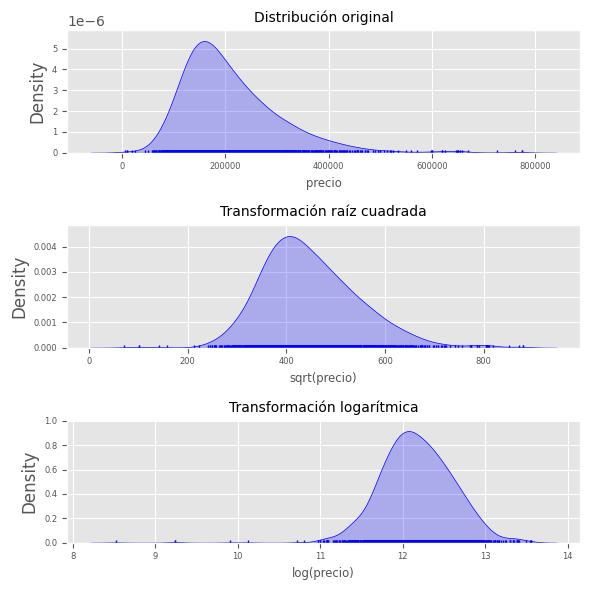

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    datos.precio,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    datos.precio,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(datos.precio),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(datos.precio),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(datos.precio),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(datos.precio),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Algunos modelos de machine learning y aprendizaje estadístico requieren que la variable respuesta se distribuya de una forma determinada. Por ejemplo, para los modelos de regresión lineal (LM), la distribución tiene que ser de tipo normal. Para los modelos lineales generalizados (GLM) (*por ejemplo regresión logistica*), la distribución tiene que ser de la familia exponencial.

Existen varias librerías en python que permiten identificar a qué distribución se ajustan mejor los datos, una de ellas es `fitter`. Esta librería permite ajustar cualquiera de las 80 distribuciones implementadas en `scipy`.

In [31]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,3090.671453,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,3158.876482,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,2967.579133,inf,0.121728,9.001774e-23
chi2,5.835610e-11,3315.562140,3331.926300,inf,0.094392,7.513341e-14
norm,6.947514e-11,3324.534158,3335.443598,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,2835.012600,inf,0.316530,2.028906e-154
powerlaw,3.132284e-10,2728.809479,2745.173639,inf,0.344929,3.981254e-184
exponpow,4.841645e-10,inf,inf,NaN,1.000000,0.000000e+00
gamma,4.841645e-10,inf,inf,3.958212,0.947917,0.000000e+00


## Variables numéricas

In [32]:
datos.select_dtypes(include=['float64', 'int']).describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


## Gráfico de distribución para cada variable numérica

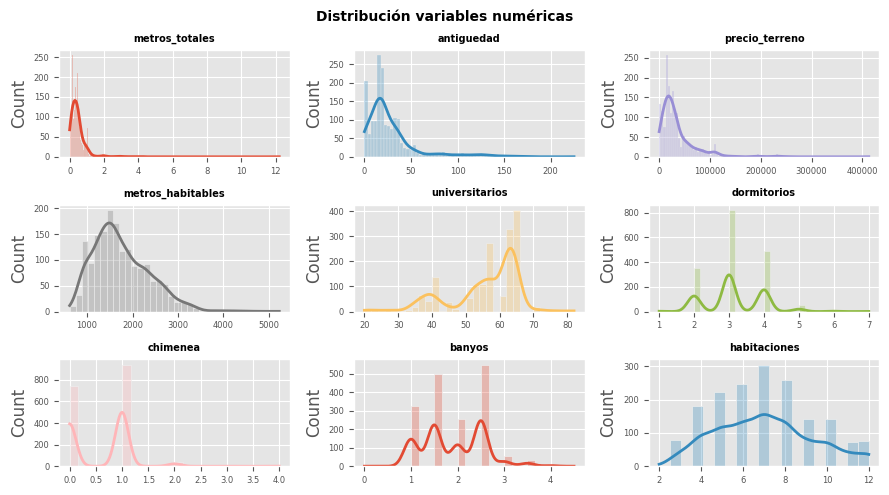

In [18]:
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = datos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable `chimenea`, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

**Valores observados de chimenea**

In [19]:
datos.chimenea.value_counts()

chimenea
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64

**Se convierte la variable chimenea a tipo string**

In [20]:
datos.chimenea = datos.chimenea.astype("str")

Como el objetivo del estudio es predecir el precio de las viviendas, el análisis de cada variable se hace también en relación a la variable respuesta `precio`. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

## Gráfico de distribución para cada variable numérica

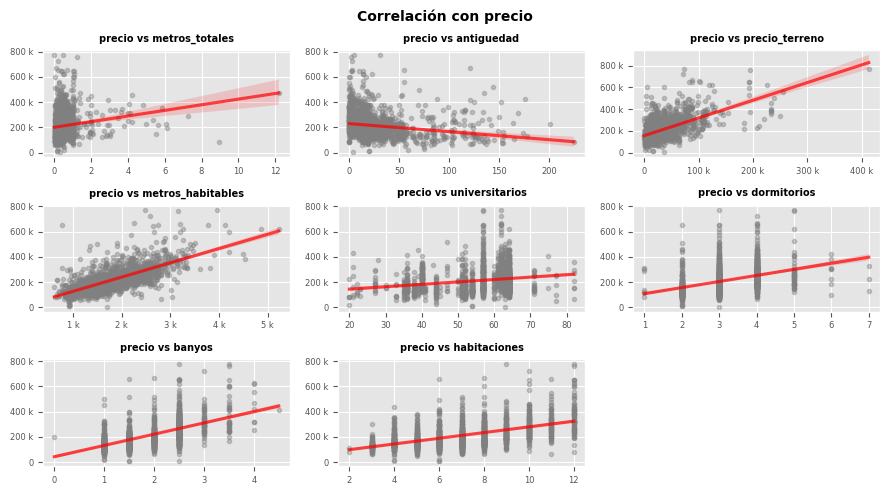

In [21]:
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

## Correlación variables numéricas

Algunos modelos (LM, GLM, ...) se ven perjudicados si incorporan predictores altamente correlacionados. Por esta razón, es conveniente estudiar el grado de correlación entre las variables disponibles.

**Correlación entre columnas numéricas**

In [22]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
44,metros_habitables,habitaciones,0.733666,0.733666
76,habitaciones,metros_habitables,0.733666,0.733666
67,banyos,metros_habitables,0.718564,0.718564
43,metros_habitables,banyos,0.718564,0.718564
36,metros_habitables,precio,0.712390,0.712390
4,precio,metros_habitables,0.712390,0.712390
78,habitaciones,dormitorios,0.671863,0.671863
62,dormitorios,habitaciones,0.671863,0.671863
42,metros_habitables,dormitorios,0.656196,0.656196
58,dormitorios,metros_habitables,0.656196,0.656196


**Heatmap matriz de correlaciones**

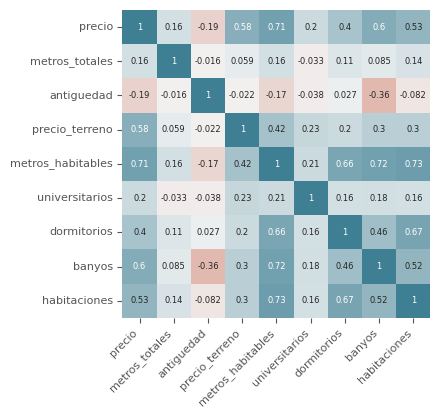

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

## Variables cualitativas

**Variables cualitativas (tipo object)**

In [24]:
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


**Gráfico para cada variable cualitativa**

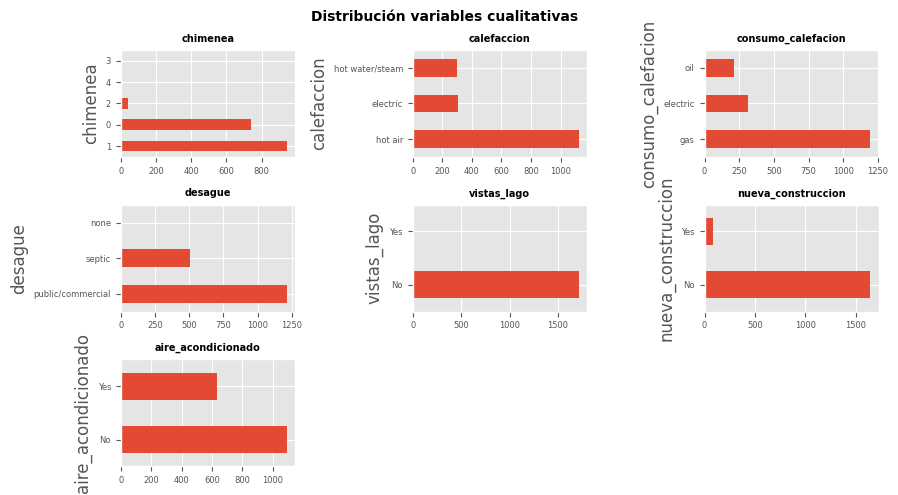

In [25]:
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

- Eliminar las observaciones del grupo minoritario si es una variable multiclase.

- Eliminar la variable si solo tiene dos niveles.

- Agrupar los niveles minoritarios en un único grupo.

- Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

Para este caso, hay que tener precaución con la variable `chimenea`. Se unifican los niveles de 2, 3 y 4 en un nuevo nivel llamado "2_mas".

In [26]:
datos.chimenea.value_counts().sort_index()

chimenea
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64

In [27]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = (
    datos['chimenea']
    .map(dic_replace) 
    .fillna(datos['chimenea'])
)

In [28]:
datos.chimenea.value_counts().sort_index()

chimenea
0        740
1        942
2_mas     46
Name: count, dtype: int64

## Gráfico de la relación entre el precio y cada variable cualitativas

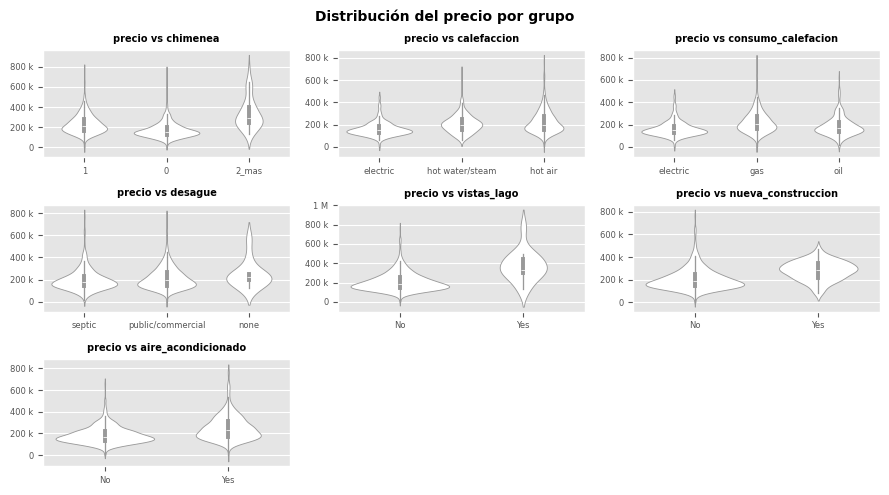

In [29]:
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'precio',
        data  = datos,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

## División train y test

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados. El reparto debe hacerse de forma aleatoria o aleatoria-estratificada.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en **problemas de clasificación**, identificar con el argumento `stratify` la variable en base a la cual hacer el reparto.

Este tipo de reparto estratificado asegura que el conjunto de entrenamiento y el de test sean similares en cuanto a la variable respuesta, sin embargo, no garantiza que ocurra lo mismo con los predictores. Por ejemplo, en un set de datos con 100 observaciones, un predictor binario que tenga 90 observaciones de un grupo y solo 10 de otro, tiene un alto riesgo de que, en alguna de las particiones, el grupo minoritario no tenga representantes. Si esto ocurre en el conjunto de entrenamiento, algunos algoritmos darán error al aplicarlos al conjunto de test, ya que no entenderán el valor que se les está pasando. Este problema puede evitarse eliminando variables con varianza próxima a cero (ver más adelante).

**Partición de Entrenamiento**

In [31]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


In [32]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


## Preprocesado de los datos (Data Preprocesing)

El preprocesado engloba todas aquellas transformaciones realizadas sobre los datos con el objetivo que puedan ser interpretados por el algoritmo de machine learning lo más eficientemente posible. Todo preprocesado de datos debe aprenderse con las observaciones de entrenamiento y luego aplicarse al conjunto de entrenamiento y al de test. Esto es muy importante para no violar la condición de que ninguna información procedente de las observaciones de test participe o influya en el ajuste del modelo. Este principio debe aplicarse también si se emplea validación cruzada (ver más adelante). En tal caso, el preprocesado debe realizarse dentro de cada iteración de validación, para que las estimaciones que se hacen con cada partición de validación no contengan información del resto de particiones. Aunque no es posible crear un único listado, a continuación se resumen algunos de los pasos de preprocesado que más se suelen necesitar.

**Imputación de valores ausentes**

La gran mayoría de algoritmos no aceptan observaciones incompletas, por lo que, cuando el set de datos contiene valores ausentes, se puede:

- Eliminar aquellas observaciones que estén incompletas.
- 
Eliminar aquellas variables que contengan valores ausentes.- 

Tratar de estimar los valores ausentes empleando el resto de información disponible (imputaci
  
Las primeras dos opciones, aunque sencillas, suponen perder información. La eliminación de observaciones solo puede aplicarse cuando se dispone de muchas y el porcentaje de registros incompletos es muy bajo. En el caso de eliminar variables, el impacto dependerá de cuánta información aporten dichas variables al modelo. Cuando se emplea la imputación, es muy importante tener en cuenta el riesgo que se corre al introducir valores en predictores que tengan mucha influencia en el modelo. Supóngase un estudio médico en el que, cuando uno de los predictores es positivo, el modelo predice casi siempre que el paciente está sano. Para un paciente cuyo valor de este predictor se desconoce, el riesgo de que la imputación sea errónea es muy alto, por lo que es preferible obtener una predicción basada únicamente en la información disponible. Esta es otra muestra de la importancia que tiene que el analista conozca el problema al que se enfrenta y pueda así tomar la mejor decisión.ón).

El módulo `sklearn.impute` incorpora varios métodos de imputación distintos:

- `SimpleImputer`: permite imputaciones empleando un valor constante o un estadístico (media, mediana, valor más frecuente) de la misma columna en la que se encuentra el valor ausente.
- `IterativeImputer`: permite imputar el valor de una columna teniendo en cuenta el resto de columnas. En concreto, se trata de un proceso iterativo en el que, en cada iteración, una de las variables se emplea como variable respuesta y el resto como predictores. Una vez obtenido el modelo, se emplea para predecir las posiciones vacías de esa variable. Este proceso se lleva a cabo con cada variable y se repite el ciclo `max_iter` veces para ganar estabilidad. La implementación de `sklearn.impute.IterativeImputer` permite que se emplee casi cualquiera de sus algoritmos para crear los modelos de imputación (KNN, RandomForest, GradientBoosting...).
- `KNNImputer`: es un caso concreto de `IterativeImputer` en el que se emplea k-Nearest Neighbors como algoritmo de imputación.el modelo.

A pesar de ser un método muy utilizado, imputar utilizando KNN presenta dos problemas: su coste computacional elevado hace que solo sea aplicable en conjuntos de datos de tamaño pequeño o moderado. Si hay variables categóricas, debido a la dificultad de medir "distancias" en este contexto, puede dar lugar a resultados poco realistas. Por estas dos razones, es más recomendable utilizar un modelo tipo *Random Forest* `IterativeImputer(predictor = RandomForestRegressor())`.

Con el argumento `add_indicator=True` se crea automáticamente una nueva columna en la que se indica con el valor 1 qué valores han sido imputados. Esto puede ser útil tanto para identificar las observaciones en las que se ha realizado alguna imputación como para utilizarla como un predictor más en el modelo.

## Exclusión de variables con varianza próxima a cero

No se deben incluir en el modelo predictores que contengan un único valor (cero-varianza) ya que no aportan información. Tampoco es conveniente incluir predictores que tengan una varianza próxima a cero, es decir, predictores que toman solo unos pocos valores, de los cuales, algunos aparecen con muy poca frecuencia. El problema con estos últimos es que pueden convertirse en predictores con varianza cero cuando se dividen las observaciones por validación cruzada o bootstrap.

La clase `VarianceThreshold` del módulo `sklearn.feature_selection` identifica y excluye todos aquellos predictores cuya varianza no supera un determinado threshold. En el caso de variables cualitativas, cabe recordar que scikitlearn requiere que se binaricen (`one hot encoding` o *dummy*) para poder entrenar los modelos. Una variable booleana sigue una distribución de Bernoulli, por lo que su varianza puede ser calculada como:

$Var[X]=p(1-p)$

Si bien la eliminación de predictores no informativos podría considerarse un paso propio del proceso de selección de predictores, dado que consiste en un filtrado por varianza, tiene que realizarse antes de estandarizar los datos, ya que después, todos los predictores tienen varianza 1.

## Estandarización y escalado de variables numéricas

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. Muchos algoritmos de machine learning (SVM, redes neuronales, lasso...) son sensibles a esto, de forma que, si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta. Existen principalmente 2 estrategias para evitarlo:

- **Centrado**: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen. `StandardScaler(with_std=False)`
  
- **Normalización (estandarización):** consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala. Hay dos formas de lograrlo:
  - Normalización Z-score (`StandardScaler`) dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.
    
    $ z=\frac{x-\mu }{\sigma }$
    
  - Estandarización max-min (`MinMaxScaler`): transformar los datos de forma que estén dentro del rango [0, 1].
    
    $ X_{norm}=\frac{X-x_{min} }{x_{max}-x_{min} }$

Nunca se deben estandarizar las variables después de ser binarizadas (ver a continuación).

## Binarización de las variables cualitativas

La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.

Por defecto, la clase `OneHotEncoder` binariza todas las variables, por lo que hay que aplicarlo únicamente a las variables cualitativas (ver como hacerlo en el apartado ColumnTransformer). Con el argumento `drop=‘first’` se elimina uno de los niveles para evitar redundancias. Volviendo al ejemplo anterior, no es necesario almacenar las tres variables, ya que, si color_rojo y color_verde toman el valor 0, la variable color_azul toma necesariamente el valor 1. Si color_rojo o color_verde toman el valor 1, entonces color_azul es necesariamente 0. Esto es importante en modelos que sufren problemas si los predictores están perfectamente correlacionados (modelos lineales sin regularización, redes neuronales...).

En ciertos escenarios puede ocurrir que, en los datos de test, aparezca un nuevo nivel que no estaba en los datos de entrenamiento. Si no se conoce de antemano cuáles son todos los posibles niveles, se puede evitar errores en las predicciones indicando `OneHotEncoder(handle_unknown='ignore')`.

La forma de preprocesar los datos dentro del ecosistema scikit-learn es empleando los `ColumnTransformer` y `pipeline`. Además de las ya mencionadas, pueden encontrarse muchas más transformaciones de preprocesado en el módulo sklearn.preprocessing.

## Pipeline y ColumnTransformer

Las clases `ColumnTransformer` y `make_column_transformer` del módulo `sklearn.compose` permiten combinar múltiples transformaciones de preprocesado, especificando a qué columnas se aplica cada una. Como todo `transformer`, tiene un método de entrenamiento (`fit`) y otro de transformación (`transform`) . Esto permite que el aprendizaje de las transformaciones se haga únicamente con observaciones de entrenamiento, y se puedan aplicar después a cualquier conjunto de datos. La idea detrás de este módulo es la siguiente:

1.  Definir todas las transformaciones (escalado, selección, filtrado...) que se desea aplicar y a qué columnas `ColumnTransformer()`. La selección de columnas puede hacerse por: nombre. índice, máscara booleana, slice, patrón regex, por tipo de columna o con las funciones de selección `make_column_selector`.

2. Aprender los parámetros necesarios para dichas transformaciones con las observaciones de entrenamiento `.fit()`.

3. Aplicar las transformaciones aprendidas a cualquier conjunto de datos `.transform()`.

**Seleccion de las variables por tipo**

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector


Se estandarizan las columnas numéricas y se hace one-hot-encoding de las  columnas cualitativas. Para mantener las columnas a las que no se les aplica 
ninguna transformación se tiene que indicar `remainder='passthrough'`.

In [34]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

Una vez que se ha definido el objeto `ColumnTransformer`, con el método `fit()` se aprenden las transformaciones con los datos de entrenamiento y se aplican a los dos conjuntos con `transform()`.

In [35]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

Por defecto, el resultado devuelto por `ColumnTransformer` es un numpy array, por lo que se pierden los nombres de las columnas. Suele ser interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. Por defecto, `OneHotEncoder` ordena las nuevas columnas de izquierda a derecha por orden alfabético.

**Convertir el output en dataframe y añadir el nombre de las columnas**

In [36]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
nombre_columnas = np.concatenate([numeric_cols, encoded_cat])
X_train_prep = preprocessor.transform(X_train)
X_train_prep = pd.DataFrame(X_train_prep, columns=nombre_columnas)
X_train_prep.head(3)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
0,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


A partir de la versión 1.2.1, scikit-learn incluye la posibilidad de que el resultado de los transformers sea un DataFrame de Pandas en lugar de un numpy array. Esto tiene la ventaja de que el resultado de toda transformación incorpora directamente el nombre de las columnas. Este comportamiento se puede indicar a nivel individual de transformer con el método `.set_output(transform="pandas")` o como una configuración global con `set_config(transform_output="pandas")` 

Cabe destacar que, si se utiliza un transformer de tipo `OneHotEncoder` en combinación con `.set_output(transform="pandas")`, se tiene que indicar que el `OneHotEncoder` no devuelva los datos en forma de matriz sparse `sparse_output = False` 


In [37]:
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

X_train_prep.head(3)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
1571,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
832,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1302,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


`ColumnTransformer` aplica las operaciones de forma paralela, no de forma secuencial, esto significa que no permite aplicar más de una transformación a una misma columna. En el caso de que sea necesario hacerlo, hay que recurrir a los `pipeline`, que también agrupan operaciones pero las ejecutan de forma secuencial, de forma que la salida de una operación es la entrada de la siguiente. Si se quieren aplicar varias transformaciones de preprocesado sobre una misma columna, es necesario agruparlas primero en un `pipeline`

En el siguiente ejemplo se combinan las transormaciones:

- Columnas numéricas: se imputan los valores ausentes con la mediana y a continuación se estandarizan.
  
- Columnas categóricas (cualitativas): se imputan los valores ausentes con el valor más frecuente y a continuación se aplica one hot encoding.

**Selección de las variables por tipo**

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()



**Transformaciones para las variables numéricas**

In [39]:

numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )

**Transformaciones para las variables categóricas**

In [40]:
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [41]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)
X_train_prep.head(3)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
1571,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
832,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1302,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


A partir de las versión `scikit-learn 0.23` se puede crear una representación interactiva de un objeto `pipeline`.

In [42]:
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])],
                  verbose_feature_names_out=False)

In [43]:
set_config(display='text')

## Crear un modelo 

El siguiente paso tras definir los datos de entrenamiento, es seleccionar el algoritmo que se va a emplear. En scikit-learn, esto se hace mediante la creación de un objeto estimator. En concreto, este objeto almacena el nombre del algoritmo, sus parámetros e hiperparámetros y contiene los métodos fit(X, y) y predict(T) que le permiten aprender de los datos y predecir nuevas observaciones. El siguiente [listado](https://scikit-learn.org/stable/user_guide.html) contiene todos los algoritmos implementados en scikit-learn.

### Entrenamiento

Se ajusta un primer modelo de regresión lineal con regularización ridge para predecir el precio de la vivienda en función de todos los predictores disponibles. Todos los argumentos de `sklearn.linear_model.Ridge` se dejan por defecto.

Es importante tener en cuenta que, cuando un modelo de regresión lineal incluye regularización en los coeficientes (ridge, lasso, elasticnet), deben estandarizarse los predictores. Para asegurar que el preprocesado se realiza únicamente con los datos de entrenamiento, se combinan las transformaciones y el entrenamiento en un mismo `pipeline`.


In [44]:
from sklearn.linear_model import Ridge

**Preprocesado**

*Identificación de columnas numéricas*

In [45]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


*Transformaciones para las variables numéricas*

In [46]:
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

*Transformaciones para las variables categóricas*

In [47]:
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

*Transformer*

In [48]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

*Pipeline*

Se combinan los pasos de preprocesado y el modelo en un mismo pipeline

In [49]:
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

*Train*

Se asigna el resultado a `_` para que no se imprima por pantalla

In [50]:
_ = pipe.fit(X=X_train, y=y_train)

## Validación

La finalidad última de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones que el modelo no ha "visto" antes. El error mostrado por defecto tras entrenar un modelo suele ser el error de entrenamiento, el error que comete el modelo al predecir las observaciones que ya ha "visto". Si bien estos errores son útiles para entender cómo está aprendiendo el modelo (estudio de residuos), no es una estimación realista de cómo se comporta el modelo ante nuevas observaciones (el error de entrenamiento suele ser demasiado optimista). Para conseguir una estimación más certera, y antes de recurrir al conjunto de test, se pueden emplear estrategias de validación basadas en `resampling`. Scikit-learn incorpora en el módulo `sklearn.model_selection` varias estrategias de validación.

- Todas ellas reciben como primer argumento un estimator que puede ser directamente un modelo o un pipeline.

- Las métricas de error de regresión se devuelven siempre en negativo de forma que, cuanto más próximo a 0 sea el valor, mejor el ajuste. Esto es así para que, los procesos de optimización siempre sean de maximización.

La forma más sencilla es emplear la función `cross_val_score()`, que utiliza por defecto `KFold`.

**Validación cruzada**

In [51]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
            )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-53936.97817183 -53076.74364513 -62746.15219054 -65963.09754244
 -48929.66260476]
Média métricas de validación cruzada: -56930.52683094099


También es posible utilizar otras estrategias de validación cruzada (*KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit*) realizando previamente el reparto con las funciones auxiliares de `sklearn.model_selection` y pasando los índices al argumento `cv`.

Cada método funciona internamente de forma distinta, pero todos ellos se basan en la idea: ajustar y evaluar el modelo de forma repetida, empleando cada vez distintos subconjuntos creados a partir de los datos de entrenamiento y obteniendo en cada repetición una estimación del error. El promedio de todas las estimaciones tiende a converger en el valor real del error de test

**Validación cruzada repetida**

In [52]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
            )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-66487.72274814 -56333.87119132 -48992.85039086 -55030.00923381
 -58790.48472729 -62651.67080028 -55779.2103529  -61820.5882113
 -57243.1819794  -48910.70385765 -50033.46929956 -51586.8240037
 -62478.2206031  -65111.86204296 -54900.98944223 -64220.39882006
 -53694.93490461 -64690.99877883 -51242.27642488 -52330.80605289
 -56777.05219272 -58644.60923875 -55573.25900549 -64350.25804164
 -50578.15339623]

Média métricas de validación cruzada: -57130.17622962478


La función `cross_validate` es similar a `cross_val_score` pero permite estimar varias métricas a la vez, tanto para test como para train, y devuelve los resultados en un diccionario.

**Validación cruzada repetida con múltiples métricas**

In [53]:
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.022760,0.011641,0.632359,0.679758,-64605.636258,-51789.256510
1,0.027221,0.014575,0.718708,0.636812,-48322.428406,-59983.019196
2,0.029438,0.009214,0.595874,0.689939,-58434.926618,-55213.669996
3,0.024387,0.007949,0.672969,0.655316,-58179.173708,-55331.536238
4,0.019617,0.010114,0.615521,0.683390,-60148.310664,-54366.426683
5,0.016653,0.014040,0.650829,0.664771,-53812.579173,-57561.184588
6,0.020213,0.015461,0.698178,0.647441,-49813.241120,-59221.407345
7,0.016957,0.010463,0.646554,0.673016,-61749.477863,-53221.315710
8,0.021741,0.010467,0.615151,0.682999,-59192.994923,-54895.180113
9,0.026310,0.013760,0.645685,0.670425,-61061.033083,-53843.654748


**Distribución del error de validación cruzada**

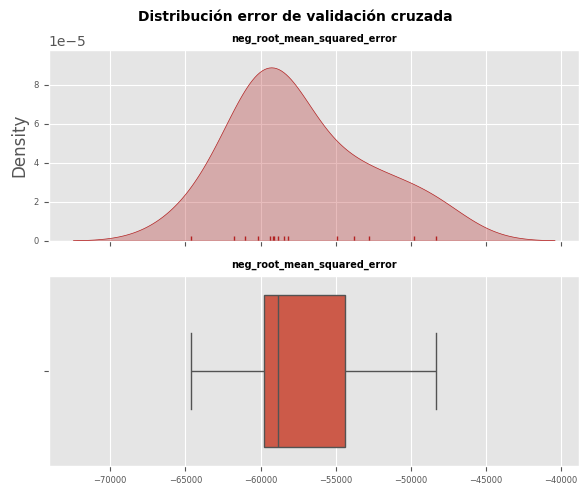

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.kdeplot(
    cv_scores['test_neg_root_mean_squared_error'],
    fill    = True,
    alpha   = 0.3,
    color   = "firebrick",
    ax      = axes[0]
)
sns.rugplot(
    cv_scores['test_neg_root_mean_squared_error'],
    color   = "firebrick",
    ax      = axes[0]
)
axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    x  = cv_scores['test_neg_root_mean_squared_error'],
    ax = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

La función `cross_val_predict`, en lugar de devolver la métrica de cada partición, devuelve las predicciones de cada partición. Esto es útil para poder evaluar los residuos del modelo y diagnosticar su comportamiento. Si se emplea validación cruzada repetida o bootstrapping, una misma observación puede formar parte de la partición de validación varias veces.

**Diagnóstico errores (residuos) de las predicciones de validación cruzada**

In [55]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

*Validación cruzada*

In [56]:
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                 )

*Gráficos*

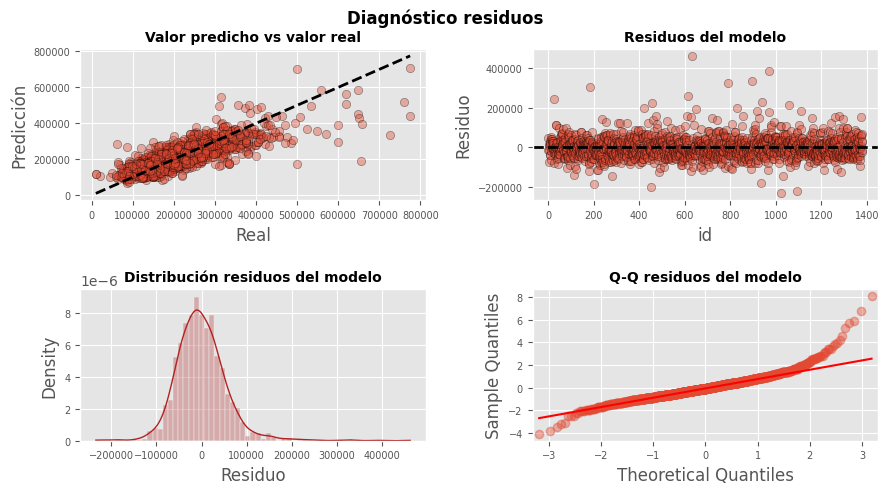

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'k--', color = 'black', lw=2
)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

A efectos prácticos, cuando se aplican métodos de `resampling` para validar un modelo hay que tener en cuenta dos cosas: el coste computacional que implica ajustar múltiples veces un modelo, cada vez con un subconjunto de datos distinto, y la reproducibilidad en la creación de las particiones. Las funciones `cross_val_score()` y `cross_val_predict` permiten paralelizar el proceso mediante el argumento `n_jobs`.

*Validación cruzada repetida paralelizada (multicore)*

In [58]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
            )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -56735.77500472445


El *root_mean_squared_error* promedio estimado mediante validación cruzada para el modelo ridge es de 56735. Este valor será contrastado más adelante cuando se calcule el error del modelo con el conjunto de test.

## Predicción

Una vez que el modelo ha sido entrenado, bien empleando directamente un `estimator` o un `pipeline`, con el método `.predict()` se pueden predecir nuevas observaciones. Si se emplea un `pipeline`, se aplican automáticamente las transformaciones aprendidas durante el entrenamiento. 

In [59]:
predicciones = pipe.predict(X_test)

**Se crea un dataframe con las predicciones y el valor real**

In [60]:
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,precio,prediccion
903,105000,112491.665253
208,113000,185142.195564
358,110500,168900.516039
1187,159000,139333.302565
319,215000,236967.476884


## Error de test

Aunque mediante los métodos de validación (*Kfold*, *LeaveOneOut*) se consiguen buenas estimaciones del error que tiene un modelo al predecir nuevas observaciones, la mejor forma de evaluar un modelo final es prediciendo un conjunto test, es decir, un conjunto de observaciones que se ha mantenido al margen del proceso de entrenamiento y optimización. Dependiendo del problema en cuestión, pueden ser interesantes unas métricas
  u otras. El módulo [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) incorpora una variedad considerable de métricas para evaluar la calidad de las predicciones.

**Error cuadrático medio del conjunto test** 

In [61]:
# mean_squared_error de test
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

65372.91638923964

En el apartado de validación, se estimó, mediante validación cruzada repetida, que el rmse del modelo era de 56735, un valor próximo al obtenido con el conjunto de test 65372.

## Hiperparámetros (tuning)

Muchos modelos, entre ellos la regresión lineal con regularización Ridge, contienen parámetros que no pueden aprenderse a partir de los datos de entrenamiento y, por lo tanto, deben de ser establecidos por el analista. A estos se les conoce como hiperparámetros. Los resultados de un modelo pueden depender en gran medida del valor que tomen sus hiperparámetros, sin embargo, no se puede conocer de antemano cuál es el adecuado. Aunque con la práctica, los especialistas en machine learning ganan intuición sobre qué valores pueden funcionar mejor en cada problema, no hay reglas fijas. La forma más común de encontrar los valores óptimos es probando diferentes posibilidades.

1. Escoger un conjunto de valores para el o los hiperparámetros.
   - `grid search`: se hace una búsqueda exhaustiva sobre un conjunto de valores previamente definidos por el usuario.
   - `random search`: se evalúan valores aleatorios dentro de unos límites definidos por el usuario.
2. Para cada valor (combinación de valores si hay más de un hiperparámetro), entrenar el modelo y estimar su error mediante un método de validación.
3. Finalmente, ajustar de nuevo el modelo, esta vez con todos los datos de entrenamiento y con los mejores hiperparámetros encontrados.

`Scikilearn` permite explorar diferentes valores de hiperparámetros mediante `model_selection.GridSearchCV()` y `model_selection.RandomizedSearchCV()`

### Grid Search

El modelo **Ridge** empleado hasta ahora tiene un hiperparámetro llamado `alpha`, que por defecto tiene el valor 1.0. Este hiperparámetro controla la penalización que se aplica a los coeficientes del modelo. Cuanto mayor es su valor, más restricción se impone sobre los coeficientes, reduciendo así varianza, atenuando el efecto de la correlación entre predictores y minimizando el riesgo de *overfitting*.

Se vuelve a ajustar un modelo Ridge con diferentes valores de `alpha` empleando validación cruzada repetida para identificar con cuál se obtienen mejores resultados.

In [62]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

**Pipe: preprocesado + modelo**

- Identificación de columnas numéricas y catégoricas

In [63]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

- Transformaciones para las variables numéricas

In [64]:
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

- Transformaciones para las variables categóricas

In [65]:
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

- Se combinan los pasos de preprocesado y el modelo en un mismo pipeline

In [66]:
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

**Grid de hiperparámetros**

In [67]:
param_grid = {'modelo__alpha': np.logspace(-5, 3, 10)}

- Búsqueda por validación cruzada

In [68]:
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

- Se asigna el resultado a `_` para que no se imprima por pantalla

In [69]:
_ = grid.fit(X = X_train, y = y_train)

**Resultados del grid**

In [70]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,2.154435,-56970.445916,4418.175726,-55927.874903,1134.881454
5,0.278256,-57005.216711,4371.468635,-55915.004214,1134.763145
4,0.035938,-57013.010756,4365.524530,-55914.737159,1134.764913
3,0.004642,-57014.089077,4364.763938,-55914.732566,1134.764954
2,0.000599,-57014.229588,4364.665841,-55914.732489,1134.764955
1,0.000077,-57014.247757,4364.653173,-55914.732488,1134.764955
0,0.00001,-57014.250104,4364.651537,-55914.732488,1134.764955
7,16.681005,-57097.924468,4650.962813,-56182.884195,1148.730719
8,129.154967,-58005.790065,4960.766701,-57357.816628,1207.601278
9,1000.0,-62585.778570,5587.506060,-62380.994562,1259.080713


**Mejores hiperparámetros**

In [71]:
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__alpha': 2.154434690031882} : -56970.445915507444 (neg_root_mean_squared_error)


**Gráfico resultados validación cruzada para cada hiperparámetro**

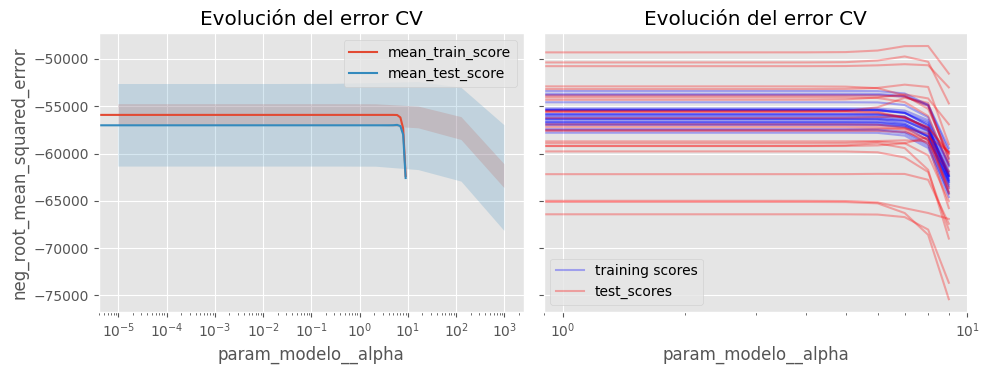

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.84), sharey=True)

# Gráfico 1
# ------------------------------------------------------------------------------
resultados.plot('param_modelo__alpha', 'mean_train_score', ax=axes[0])
resultados.plot('param_modelo__alpha', 'mean_test_score', ax=axes[0])
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_title('Evolución del error CV')
axes[0].set_ylabel('neg_root_mean_squared_error');

# Gráfico 2
# ------------------------------------------------------------------------------
numero_splits = grid.n_splits_

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_train_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'blue', 
    ax    = axes[1]
)

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_test_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'red', 
    ax    = axes[1]
)

axes[1].legend(
    (axes[1].get_children()[0], axes[1].get_children()[numero_splits]),
    ('training scores', 'test_scores')
)
axes[1].set_xscale('log')
axes[1].set_title('Evolución del error CV')
axes[1].set_ylabel('neg_root_mean_squared_error');

fig.tight_layout()

**Comparación de hiperparámetros**

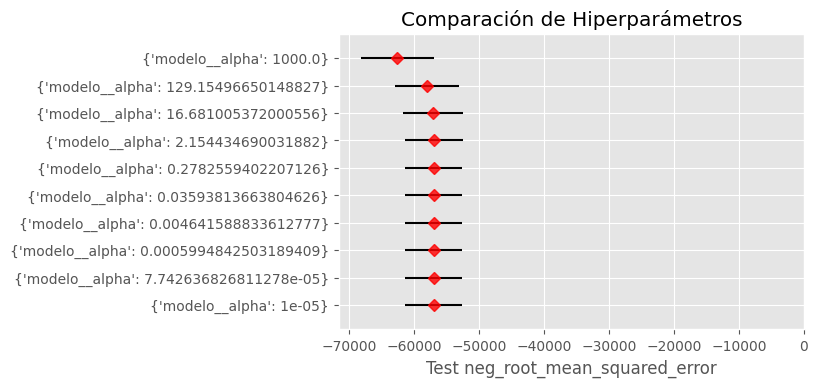

In [73]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_xlabel('Test neg_root_mean_squared_error');

Si en `GridSearchCV()` se indica `refit=True`, tras identificar los mejores hiperparámetros, se reentrena el modelo con ellos y se almacena en `.best_estimator_`.

## Random grid search

`GridSearchCV()` hace una búsqueda exhaustiva evaluando todas las combinaciones de parámetros. Esta estrategia tiene el inconveniente de que se puede invertir mucho tiempo en regiones de poco interés antes de evaluar otras combinaciones. Una alternativa es hacer una búsqueda aleatoria, de esta forma, se consigue explorar el espacio de búsqueda de una forma más distribuida. `RandomizedSearchCV()` permite este tipo de estrategia, únicamente requiere que se le indique el espacio de búsqueda de cada hiperparámetro (lista de opciones o una distribución) y el número de combinaciones aleatorias a evaluar.

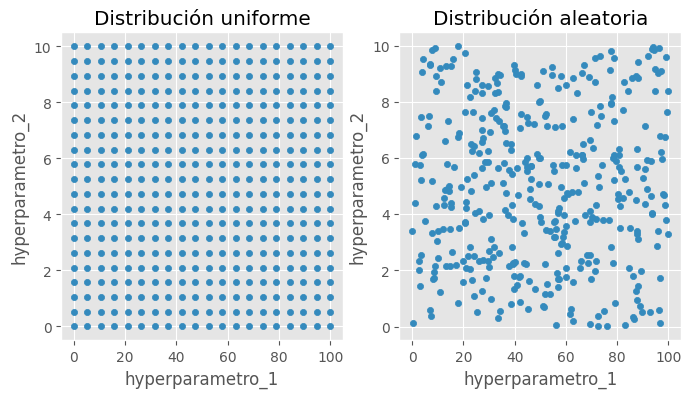

In [74]:
from itertools import product
import random

fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 4),
                        sharex = True, sharey = False)
# Grid exhaustivo
# ==============================================================================
hyperparametro_1 = np.linspace(start = 0, stop = 100, num=20)
hyperparametro_2 = np.linspace(start = 0, stop = 10, num=20)

# Lista con todas las combinaciones
combinaciones = [list(x) for x in product(hyperparametro_1, hyperparametro_2)]
combinaciones = pd.DataFrame.from_records(
                    combinaciones,
                    columns=['hyperparametro_1', 'hyperparametro_2']
                )

combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[0]
)
axs[0].set_title('Distribución uniforme')

# Grid aleatorio (random grid)
# ==============================================================================
hyperparametro_1 = np.random.uniform(low = 0, high = 100, size  = 400)
hyperparametro_2 = np.random.uniform(low = 0, high = 10, size  = 400)

combinaciones = pd.DataFrame(
                    {
                    'hyperparametro_1': hyperparametro_1,
                    'hyperparametro_2': hyperparametro_2,
                    }
                )
combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[1]
)
axs[1].set_title('Distribución aleatoria');

In [75]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {'modelo__alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
33,3.764936,-57065.294676,3748.530538,-55948.827676,913.30537


## Optimización bayesiana

Aunque estas tres estrategias son totalmente válidas y generan buenos resultados, sobretodo cuando se tiene criterio para acotar el rango de búsqueda, comparten una carencia común: ninguna tiene en cuenta los resultados obtenidos hasta el momento, lo que les impide focalizar la búsqueda en las regiones de mayor interés y evitar regiones innecesarias.

Una alternativa es la búsqueda de hiperparámetros con métodos de optimización bayesiana. En términos generales, la optimización bayesiana de hiperparámetros consiste en crear un modelo probabilístico en el que la función objetivo es la métrica de validación del modelo (rmse, auc, precisión..). Con esta estrategia, se consigue que la búsqueda se vaya redirigiendo en cada iteración hacia las regiones de mayor interés. El objetivo final es reducir el número de combinaciones de hiperparámetros con las que se evalúa el modelo, eligiendo únicamente los mejores candidatos. Esto significa que, la ventaja frente a las otras estrategias mencionadas, se maximiza cuando el espacio de búsqueda es muy amplio o la evaluación del modelo es muy lenta.

Dos librerías que permiten aplicar estrategias de optimización Bayesiana para encontrar hiperparámetros en modelos `scikitlearn` son: `scikit-optimize` y `optuna`.

> *Nota*: `scikit-optimize` ha dejado de ser compatible con versiones de numpy igual o superiores a 1.24.0

**Búsqueda de hiperparámetros con scikit-optimize**

In [76]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

espacio_busqueda  = [Real(1e-6, 1e+3, "log-uniform", name='modelo__alpha')]

@use_named_args(espacio_busqueda)
def objective(**params):
    pipe.set_params(**params)
    return -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))

resultados_opt = gp_minimize(
                    func         = objective,
                    dimensions   = espacio_busqueda,
                    n_calls      = 50,
                    random_state = 0
                )

print(f"Mejor score validación: {resultados_opt.fun}")
print(f"Mejores hiperparámetros: {list(zip([x.name for x in espacio_busqueda], resultados_opt.x))}")

Mejor score validación: 56904.581493194026
Mejores hiperparámetros: [('modelo__alpha', 4.851163928743106)]


**Plot para ver la evolución de la optimización**

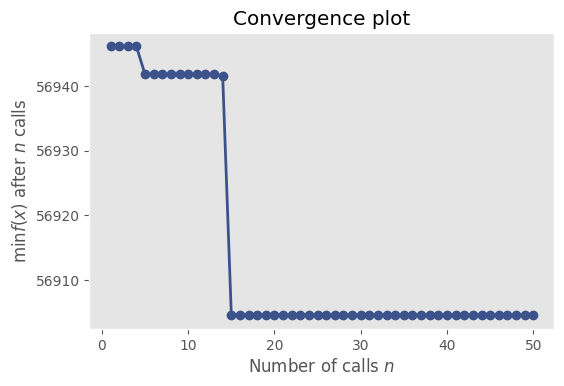

In [77]:
fig, ax = plt.subplots(figsize=(6, 3.84))
plot_convergence(resultados_opt, ax = ax);

**Búsqueda de hiperparámetros con Optuna**

In [78]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    
    modelo__alpha = trial.suggest_float("modelo__alpha", 1e-6, 1e+3, log=True)
    pipe.set_params(**{'modelo__alpha':modelo__alpha})
    score = -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)
print(study.best_trial)
print("")
print(f"Mejor score validación: {study.best_value}")
print(f"Mejores hiperparámetros: {study.best_params}")

Best trial: 31. Best value: 56904.7: 100%|██████████| 50/50 [00:04<00:00, 10.59it/s]

FrozenTrial(number=31, state=TrialState.COMPLETE, values=[56904.656419143124], datetime_start=datetime.datetime(2023, 11, 26, 20, 41, 5, 257916), datetime_complete=datetime.datetime(2023, 11, 26, 20, 41, 5, 347791), params={'modelo__alpha': 4.603046006125831}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'modelo__alpha': FloatDistribution(high=1000.0, log=True, low=1e-06, step=None)}, trial_id=31, value=None)

Mejor score validación: 56904.656419143124
Mejores hiperparámetros: {'modelo__alpha': 4.603046006125831}


## Tuning (ajuste) del preprocesado

En la mayoría de casos, el proceso de optimización se centra en los hiperparámetros del modelo. Sin embargo, también puede ser muy interesante comparar diferentes transformaciones de preprocesado. Gracias a los pipeline, esto puede hacerse de la misma forma que con los hiperparametros. Véase el siguiente ejemplo en el que se compara el incorporar interacciones entre predictores.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

**Pipe: preprocesado + modelo**

- Transformaciones para las variables numéricas

In [80]:
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

- Transformaciones para las variables categóricas

In [81]:
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

- Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.

In [82]:
pipe = Pipeline(
        [('preprocessing', preprocessor),
        ('interactions', PolynomialFeatures(degree=2)),
        ('modelo', Ridge())])

- Grid de hiperparámetros

In [83]:
param_grid = {'interactions': [PolynomialFeatures(degree=2), 'passthrough'],
              'modelo__alpha': np.logspace(-5, 3, 10)}

- Búsqueda por validación cruzada

In [84]:
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['metros_totales',
                                                                          'antiguedad',
                                                                          'precio_terreno',
                                                                          'metros_habitables',
                                                                          'universitarios',
                               

- Resultatos del grid

In [85]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_interactions,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
16,passthrough,2.154435,-57143.233145,3664.555722,-55918.482036,935.538264


## Algoritmos

En los siguientes apartados se entrenan diferentes modelos de machine learning con el objetivo de compararlos e identificar el que mejor resultado obtiene en predecir el precio de las viviendas.

## K-Nearest Neighbor (kNN)

K-Nearest Neighbor es uno de los algoritmos de machine learning más simples. Su funcionamiento es el siguiente: para predecir una observación se identifican las K observaciones del conjunto de entrenamiento que más se asemejan a ella (en base a sus predictores) y se emplea como valor predicho el promedio de la variable respuesta en dichas observaciones. Dada su sencillez, suele dar peores resultados que otros algoritmos, pero es un buen referente como *baseline*.

In [86]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
5,26,-61639.44371,4105.200781,-59057.61091,1111.975615


**Resultados del grid**

**Gráfico resultados validación cruzada para cada hiperparámetro**

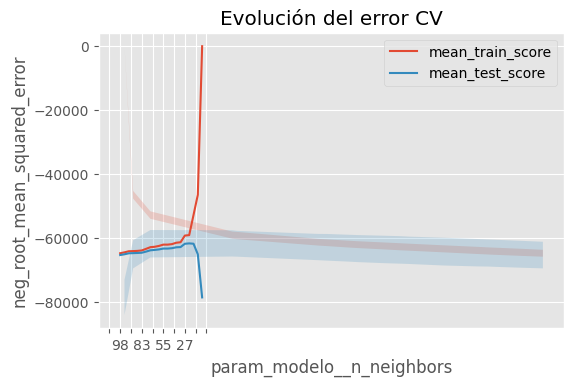

In [87]:
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

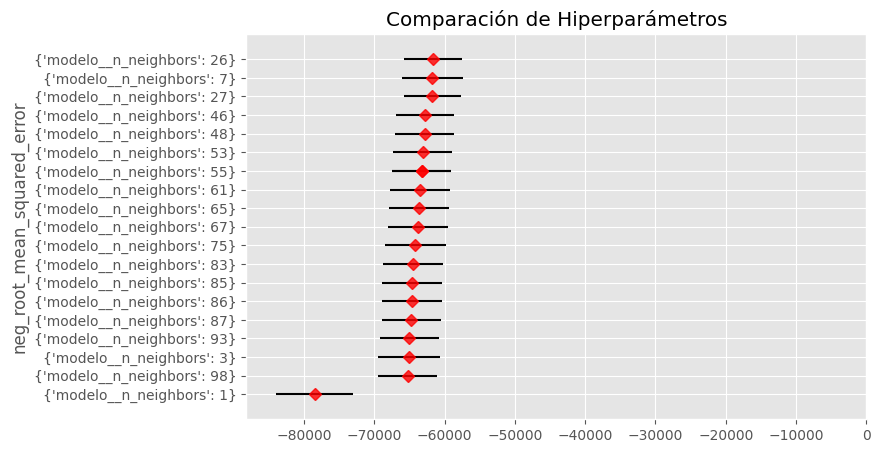

In [88]:
fig, ax = plt.subplots(figsize=(8, 5))
resultados = resultados.sort_values('mean_test_score', ascending = True)
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica);

Una vez identificados los mejores hiperparámetros, se reentrena el modelo indicando los valores óptimos en sus argumentos. Si en el `GridSearchCV()` se indica `refit=True`, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en `.best_estimator_`.

**Error de test del modelo final**

In [89]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 67631.40888902951


## Regresión lineal (Ridge y Lasso)

La regresión lineal es un método estadístico que trata de modelar la relación lineal entre una variable continua (variable dependiente, respuesta o dependiente) y una o más variables independientes (regresores o predictores) mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una.

Además, el modelo lineal puede incluir regularización durante su ajuste, por lo que también incluye los modelos `ridge regression`, `lasso` y `elastic net`.

**`Scikit-Learn`** incorpora 3 tipos de regularización para los modelos lineales con el objetivo de evitar overfitting (sobreajuste), reducir varianza y atenuar el efecto de la correlación entre predictores. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).

- El modelo **lasso** es un modelo lineal por mínimos cuadrados que incorpora una regularización que penaliza la suma del valor absolutos de los coeficientes de regresión ($  \left\|\beta  \right\|_{1}=\sum_{k=1}^{p}\left|\beta _{k} \right| $). A esta penalización se le conoce como *l1* y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue seleccionar los predictores más influyentes. El grado de penalización está controlado por el hiperparámetro $ \lambda$. Cuando $ \lambda=0$, el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios. A medida que $ \lambda $ aumenta, mayor es la penalización y más predictores quedan excluidos.

- El modelo ridge es un modelo lineal por mínimos cuadrados que incorpora una regularización que penaliza la suma de los coeficientes elevados al cuadrado ($ \left\|\beta  \right\|_{2}^{2}=\sum_{k=1}^{p}\beta _{k}^{2}$). A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. Al igual que lasso, el grado de penalización está controlado por el hiperparámetro $\lambda$.

La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno. Esto supone una ventaja notable de lasso en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos. Por otro lado, cuando existen predictores altamente correlacionados (linealmente), ridge reduce la influencia de todos ellos a la vez y de forma proporcional, mientras que lasso tiende a seleccionar uno de ellos, dándole todo el peso y excluyendo al resto. En presencia de correlaciones, esta selección varía mucho con pequeñas perturbaciones (cambios en los datos de entrenamiento), por lo que, las soluciones de lasso, son muy inestables si los predictores están altamente correlacionados.

Para conseguir un equilibrio óptimo entre estas dos propiedades, se puede emplear lo que se conoce como penalización *elastic net*, que combina ambas estrategias.

El modelo elastic net incluye una regularización que combina la penalización *l1* y *l2*  ($\alpha \lambda \left\|\beta  \right\|_{1}+\frac{1}{2}\left ( 1-\alpha  \right )\left\|\beta  \right\|_{2}^{2}$). El grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro  $\alpha$. Su valor debe estar comprendido en el intervalo [0,1], cuando $\alpha = 0$, se aplica *ridge regression* y cuando $\alpha = 1$ se aplica *lasso*. La combinación de ambas penalizaciones suele dar lugar a buenos resultados. Una estrategia frecuentemente utilizada es asignarle casi todo el peso a la penalización *l1* ($\alpha$ muy próximo a 1) para conseguir seleccionar predictores y un poco a la *l2* para dar cierta estabilidad en el caso de que algunos predictores estén correlacionados. 

Encontrar el mejor modelo implica identificar los valores óptimos de los hiperparámetros de regularización $\alpha$ y $\lambda$.

In [90]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
10,3.396739,-57030.638109,4934.582681,-55925.35706,1262.718973


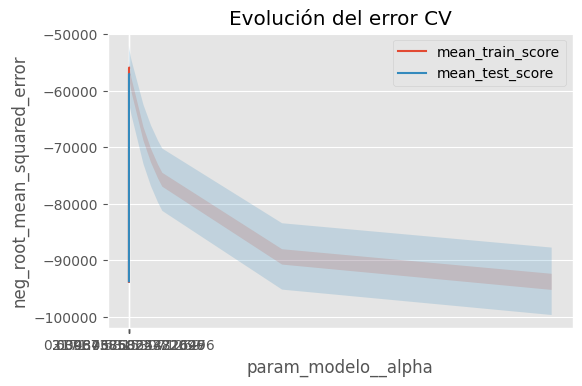

In [91]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [92]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 65406.828942794586


## Random Forest

Un modelo Random Forest está formado por un conjunto de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping). La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo. Para conocer más sobre este tipo de modelo visitar Random Forest con Python.

In [93]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
12,2000,7,20,-54315.710497,5968.772616,-20200.384078,538.056087


In [94]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 61453.50236376489


## Gradient Boosting Trees

Un modelo Gradient Boosting Trees está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_gbm}")

## Stacking

A modo general, el término model ensembling hace referencia a la combinación de las predicciones de dos o más modelos distintos con el objetivo de mejorar las predicciones finales. Esta estrategia se basa en la asunción de que, distintos modelos entrenados independientemente, emplean distintos aspectos de los datos para realizar las predicciones, es decir, cada uno es capaz de identificar parte de la “verdad” pero no toda ella. Combinando la perspectiva de cada uno de ellos, se obtiene una descripción más detallada de la verdadera estructura subyacente en los datos. A modo de analogía, imagínese un grupo de estudiantes que se enfrentan a un examen multidisciplinal. Aunque todos obtengan aproximadamente la misma nota, cada uno de ellos habrá conseguido más puntos con las preguntas que tratan sobre las disciplinas en las que destacan. Si en lugar de hacer el examen de forma individual, lo hacen en grupo, cada uno podrá contribuir en los aspectos que más domina, y el resultado final será probablemente superior a cualquiera de los resultados individuales.

La clave para que el ensembling consiga mejorar los resultados es la diversidad de los modelos. Si todos los modelos combinados son similares entre ellos, no podrán compensarse unos a otros. Por esta razón, se tiene que intentar combinar modelos que sean lo mejor posible a nivel individual y lo más diferentes entre ellos.

Las formas más simples de combinar las predicciones de varios modelos es emplear la media para problemas de regresión y la moda para problemas de clasificación. Sin embargo existen otras aproximaciones más complejas capaces de conseguir mejores resultados:

- Ponderar las agregaciones dando distinto peso a cada modelo, por ejemplo, en proporción al accuracy que han obtenido de forma individual.

- Super Learner (stacked regression): emplear un nuevo modelo para que decida la mejor forma de combinar las predicciones de los otros modelos.


## Algoritmo Super Learner

La implementación de Super Learner disponible en scikit-learn en las clases `StackingRegressor` y `StackingClassifier` sigue el siguiente algoritmo:

**Definición del ensemble**

1. Definir un listado con los algoritmos base (cada uno con los hiperparámetros pertinentes).

2. Seleccionar el algoritmo de *metalearning* que defina cómo se entrena en modelo superior. Por defecto, se emplea `RidgeCV` para regresión y `LogisticRegression` para clasificación.

**Entrenamiento del ensemble**

1. Entrenar cada uno de los algoritmos base con el conjunto de entrenamiento.
2. Realizar k-fold cross-validation con cada uno de los algoritmos base y almacenar las predicciones hechas en cada una de las k particiones.
3. Combinar las predicciones del paso 2 en una única matriz NxL (N = número de observaciones en el conjunto de entrenamiento, L = número de modelos base).
4. Entrenar el metalearning con la variable respuesta y la matriz NxL como predictores.
5. El *Super learner* final está formado por los modelos base y el modelo *metalearning*.

**Predecir**

1. Predecir la nueva observación con cada uno de los modelos base.
2. Emplear las predicciones de los modelos base como input del metalearner para obtener la predicción final.

Se procede a crear un *stacking* con los modelos *Ridge* y *RandomForest*, empleando en cada caso lo mejores hiperparámetros encontrados en los apartados anteriores.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Pipeline: preprocesado + modelos para el stacking
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y los modelos creando varios pipeline.
pipe_ridge = Pipeline([('preprocessing', preprocessor),
                     ('ridge', Ridge(alpha=3.4))])

pipe_rf = Pipeline([('preprocessing', preprocessor),
                     ('random_forest', RandomForestRegressor(
                                         n_estimators = 1000,
                                         max_features = 7,
                                         max_depth    = 20
                                        )
                     )])

In [ ]:
# Definición y entrenamiento del StackingRegressor
# ==============================================================================
estimators = [('ridge', pipe_ridge),
              ('random_forest', pipe_rf)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = stacking_regressor.fit(X = X_train, y = y_train)

In [ ]:
# Error de test del stacking
# ==============================================================================
modelo_final = stacking_regressor
predicciones = modelo_final.predict(X = X_test)
rmse_stacking = mean_squared_error(
                    y_true  = y_test,
                    y_pred  = predicciones,
                    squared = False
                  )
print(f"El error (rmse) de test es: {rmse_stacking}")

## Comparación

Se compara el error de test de todos los modelos entrenados.

In [ ]:
error_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting',
                                   'stacking'],
                        'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm, rmse_stacking]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

In [ ]:
import session_info
session_info.show(html=False)